In [269]:
import warnings
warnings.filterwarnings('ignore')
from numpy.ma.extras import median
import pandas as pd
import scipy
from statsmodels.graphics.gofplots import ProbPlot
sb.set()
import numpy as np
import seaborn as sb
from scipy import stats
import statsmodels.stats
import matplotlib.pyplot as plt
from joblib import PrintTime
from sklearn.cluster import KMeans, dbscan
from scipy.cluster import hierarchy
from joblib import PrintTime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statistics
sb.set()
%config InlineBackend.figure_format = 'svg'
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["image.cmap"] = "viridis"

DPI_VALUE = 200

In [2]:
!gdown --id 1sC3FkqslaBsj1CQTNPBlfZwfkhms_fTC


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1sC3FkqslaBsj1CQTNPBlfZwfkhms_fTC
To: /content/Книжный АД :D.xlsx
100% 84.8k/84.8k [00:00<00:00, 8.71MB/s]


In [3]:
xl = pd.ExcelFile('/content/Книжный АД :D.xlsx')
main_df2 = xl.parse('Лист2') 


In [4]:
main_df2.shape

(180, 13)

In [5]:
main_df2.describe()

,цена,количество страниц,визуальная привлекательность (1 - 5),качество обложки (1 - 5),качество переплёта (1 - 5),качество бумаги (1 - 5),качество печати (1 - 5),формат книги (0-3),размер книги (0-3),эксперт
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,180.000000
mean,984.766667,412.377778,3.688889,3.944444,3.750000,3.816667,4.094444,1.211111,1.20000,2.500000
std,754.003031,207.399249,1.201902,1.194598,1.218457,0.959952,0.856766,0.804935,0.68829,0.765893
min,148.000000,112.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000
25%,523.500000,255.000000,3.000000,4.000000,3.000000,3.000000,4.000000,1.000000,1.00000,2.000000
50%,780.000000,383.500000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.00000,3.000000
75%,1212.500000,512.000000,5.000000,5.000000,5.000000,4.250000,5.000000,2.000000,2.00000,3.000000
max,4930.000000,1225.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.00000,3.000000


In [6]:
some_cols = [
    "цена",
    "количество страниц",
    "визуальная привлекательность (1 - 5)",
    "качество обложки (1 - 5)",
    "качество переплёта (1 - 5)",
    "качество бумаги (1 - 5)",
    "качество печати (1 - 5)",
    "формат книги (0-3)",
    "размер книги (0-3)",
    "эксперт"
]
main_df2[some_cols].head()

,цена,количество страниц,визуальная привлекательность (1 - 5),качество обложки (1 - 5),качество переплёта (1 - 5),качество бумаги (1 - 5),качество печати (1 - 5),формат книги (0-3),размер книги (0-3),эксперт
0,579.0,350.0,3.0,4.0,3.0,4.0,4.0,1.0,1.0,1.0
1,579.0,348.0,3.0,3.0,3.0,4.0,4.0,1.0,1.0,1.0
2,1064.0,687.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,1.0
3,852.0,415.0,4.0,5.0,3.0,4.0,5.0,1.0,1.0,1.0
4,531.0,351.0,3.0,4.0,3.0,4.0,3.0,1.0,1.0,1.0


In [7]:
main_data2 = np.array(main_df2)
main_data2[main_data2 == 'популярные бестселлеры'] = 0.
main_data2[main_data2 == 'научно-популярная литература'] = 1.
main_data2[main_data2 == 'классика'] = 2.

main_data2[main_data2 == 'Читай-город'] = 0.
main_data2[main_data2 == 'Книжный лабиринт'] = 1.
main_data2[main_data2 == 'Молодая гвардия'] = 2.

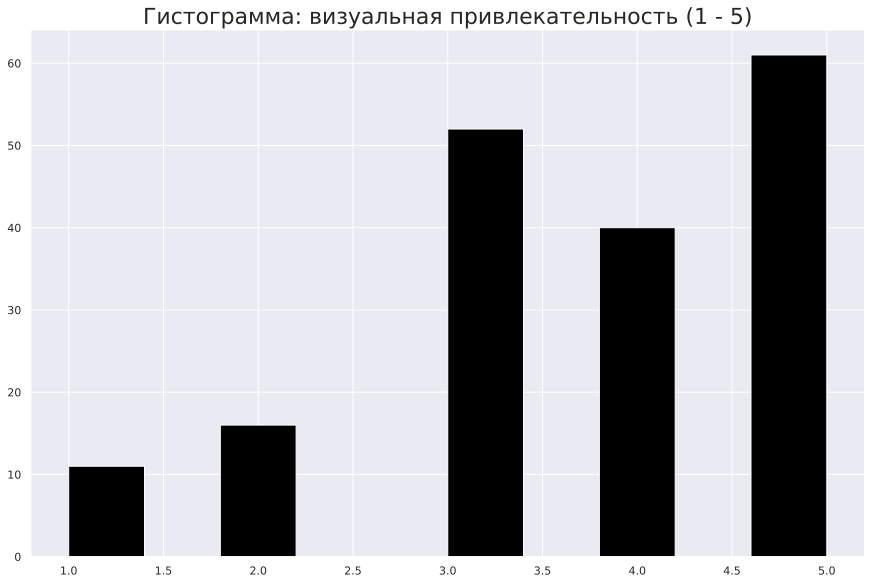

In [8]:
columns = ['качество обложки (1 - 5)',
       'качество переплёта (1 - 5)', 'качество бумаги (1 - 5)',
       'качество печати (1 - 5)', 'формат книги (0-3)', 'размер книги (0-3)']

fig, ax = plt.subplots(1, 1, figsize=(12, 8), constrained_layout=True)

#sb.distplot(main_data[:, i], ax=ax[int(i>4), i%5], kde=False)
ax.hist(main_df2["визуальная привлекательность (1 - 5)"], color='black')
ax.set_title("Гистограмма: визуальная привлекательность (1 - 5)", fontsize=22)

plt.savefig('визуальная привлекательность.png', bbox_inches='tight', dpi=DPI_VALUE)

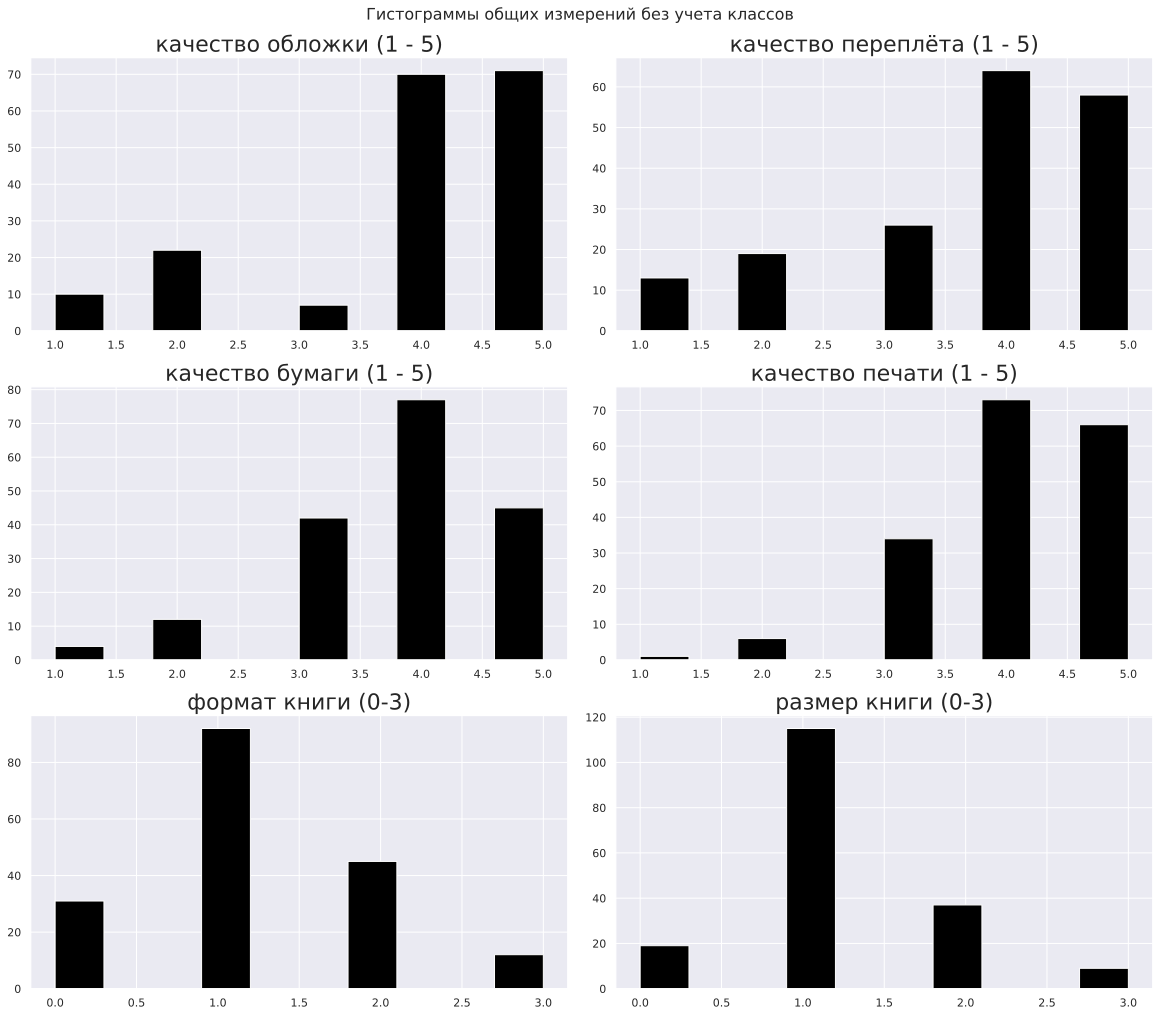

In [9]:
columns = ['качество обложки (1 - 5)',
       'качество переплёта (1 - 5)', 'качество бумаги (1 - 5)',
       'качество печати (1 - 5)', 'формат книги (0-3)', 'размер книги (0-3)']

fig, ax = plt.subplots(3, 2, figsize=(16, 14), constrained_layout=True)

counter = 0

for i in range(3):
    for j in range(2):
        ax[i, j].hist(main_df2[columns[counter]], color='black')
        ax[i, j].set_title(columns[counter], fontsize=22)
        counter += 1

fig.suptitle('Гистограммы общих измерений без учета классов', fontsize=16)

plt.savefig('разное.png', bbox_inches='tight', dpi=DPI_VALUE)

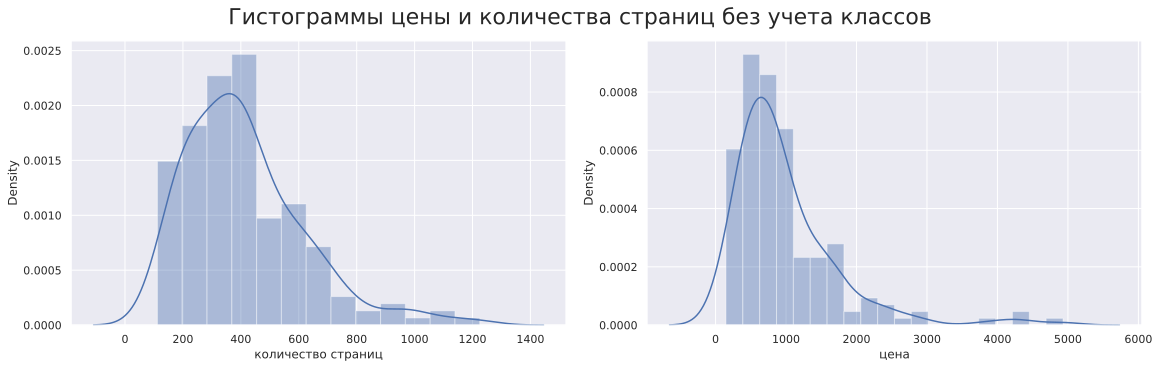

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5), constrained_layout=True)

for i, name in enumerate(['количество страниц', 'цена']):
    sb.distplot(main_df2[name], ax=ax[i])
fig.suptitle('Гистограммы цены и количества страниц без учета классов', fontsize=22)


plt.savefig('цена_и_колво_страниц.png', bbox_inches='tight', dpi=DPI_VALUE)

In [11]:
from scipy.stats import norm, expon, uniform

In [12]:
def template_block_structure_first(df, name, categories, needed_cols, color='b', kde=True, figsize=(27, 15)):
    fig, ax = plt.subplots(len(needed_cols), len(categories), figsize=figsize, constrained_layout=True)
    for i, col in enumerate(needed_cols):
        for j, category in enumerate(categories):
            handled_df = df[df[name] == category]
            sb.distplot(handled_df[col], ax=ax[i, j], color=color, kde=kde)
            ax[i, j].set_title(category, fontsize=22)

In [13]:
def template_block_structure_second(df, name, categories, needed_cols, color='b'):
    for i, col in enumerate(needed_cols):
        fig, ax = plt.subplots(1, len(categories), figsize=(35, 12), constrained_layout=True)
        for j, category in enumerate(categories):
            handled_df = df[df[name] == category]
            sb.histplot(handled_df[col], color=color, kde=False, stat="density", ax=ax[j])
            ax[j].set_title(category, linewidths=2)

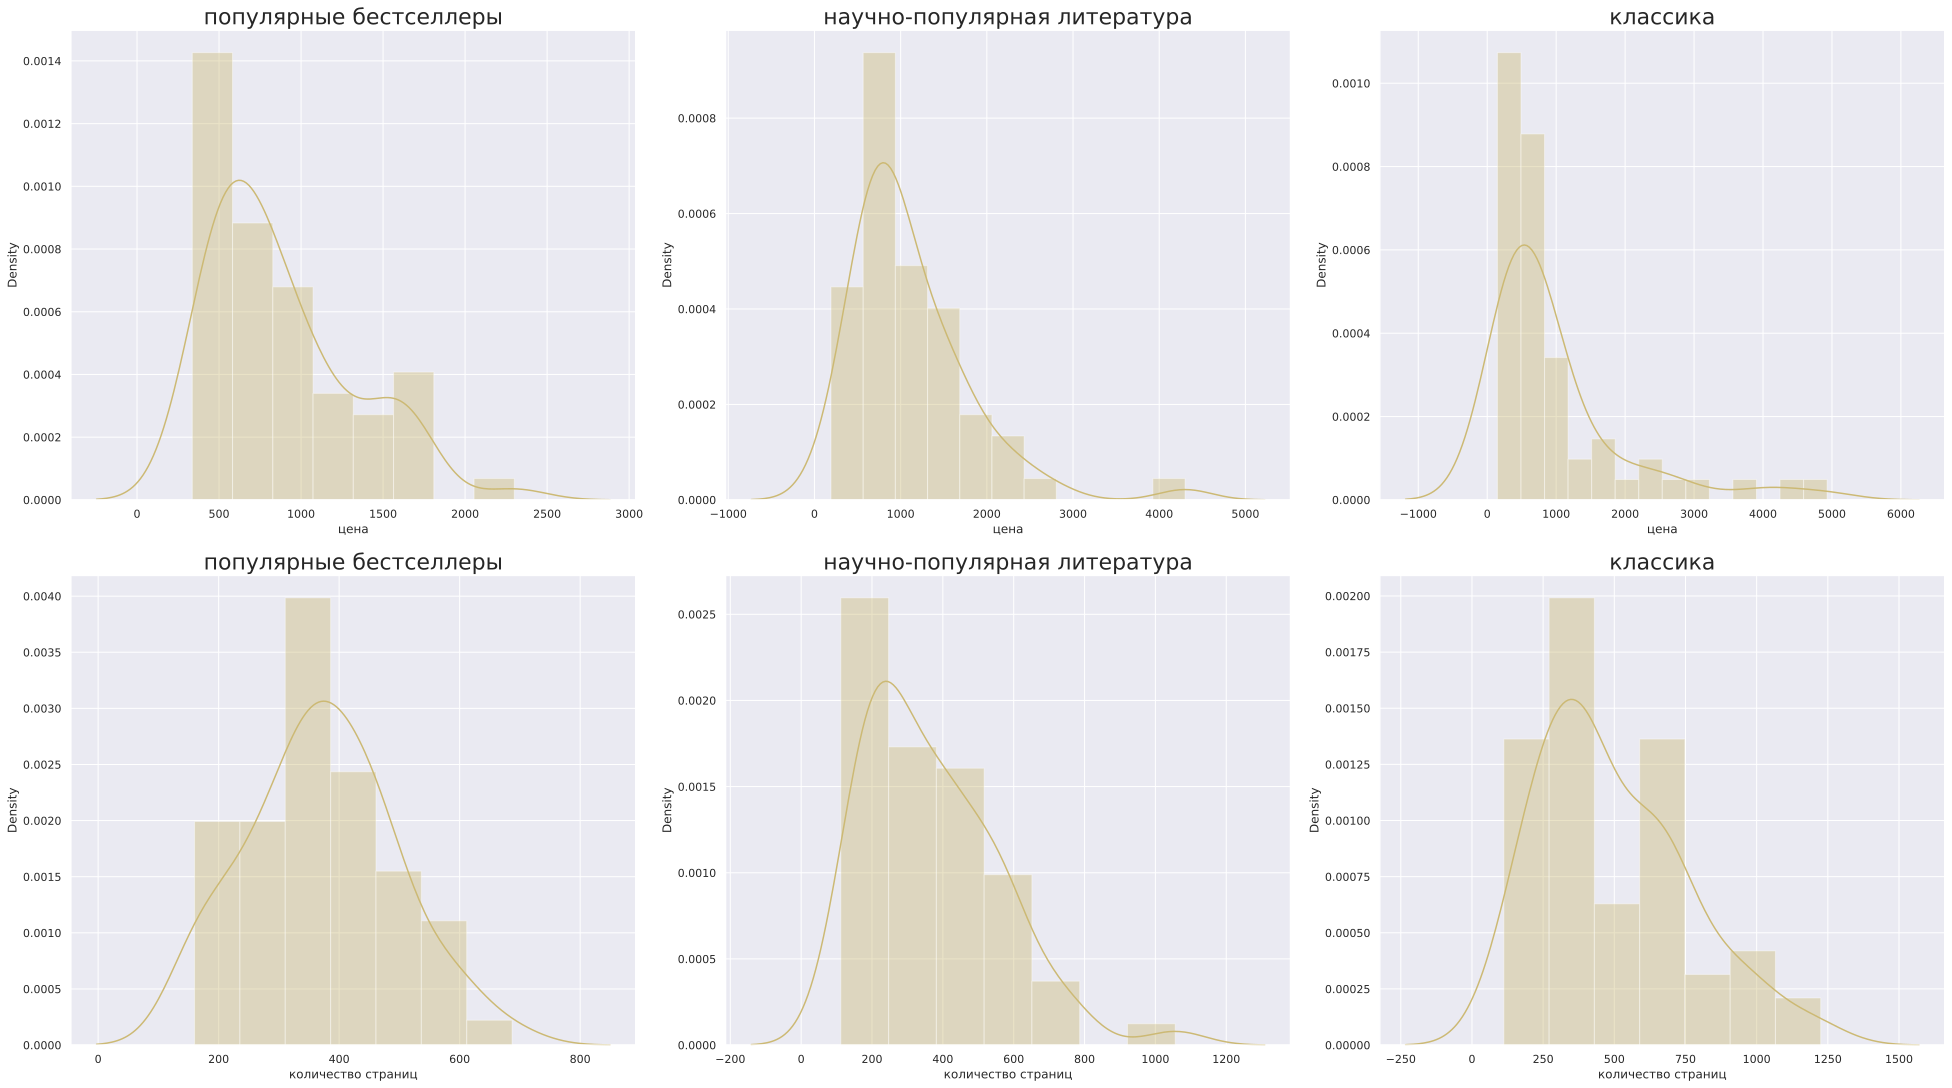

In [14]:
name = 'категория книг'

categories = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

needed_cols = ['цена', 'количество страниц']

template_block_structure_first(main_df2, name, categories, needed_cols, 'y', True)
plt.savefig('цена_по_категориям_1', bbox_inches='tight', dpi=DPI_VALUE)

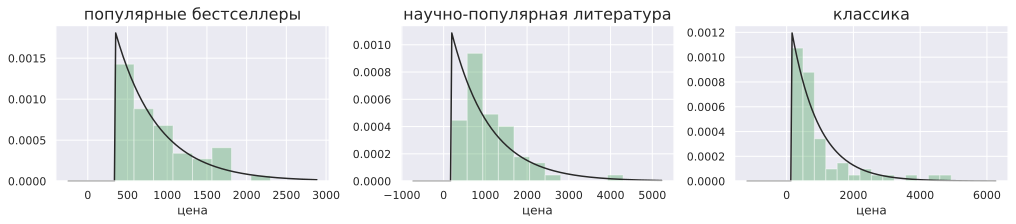

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(14, 3), constrained_layout=True)

col = 'цена'

handled_df = main_df2[main_df2['категория книг'] == 'популярные бестселлеры']
sb.distplot(handled_df[col], color='g', fit=expon, kde=False, ax=ax[0])
ax[0].set_title('популярные бестселлеры', fontsize=16)

handled_df = main_df2[main_df2['категория книг'] == 'научно-популярная литература']
sb.distplot(handled_df[col], color='g', fit=expon, kde=False, ax=ax[1])
ax[1].set_title('научно-популярная литература', fontsize=16)

handled_df = main_df2[main_df2['категория книг'] == 'классика']
sb.distplot(handled_df[col], color='g', fit=expon, kde=False, ax=ax[2])
ax[2].set_title('классика', fontsize=16)

plt.savefig('цена_по_категориям_2', bbox_inches='tight', dpi=DPI_VALUE)

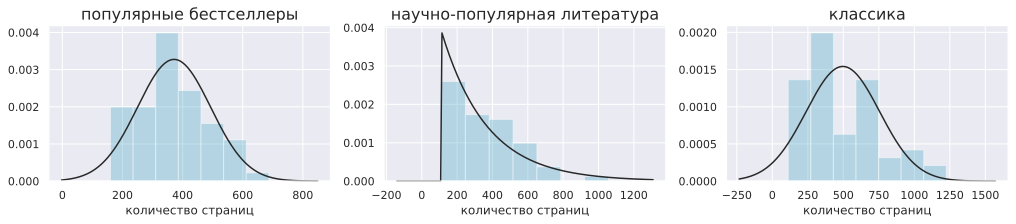

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(14, 3), constrained_layout=True)

col = 'количество страниц'

handled_df = main_df2[main_df2['категория книг'] == 'популярные бестселлеры']
sb.distplot(handled_df[col], color='c', fit=norm, kde=False, ax=ax[0])
ax[0].set_title('популярные бестселлеры', fontsize=16)

handled_df = main_df2[main_df2['категория книг'] == 'научно-популярная литература']
sb.distplot(handled_df[col], color='c', fit=expon, kde=False, ax=ax[1])
ax[1].set_title('научно-популярная литература', fontsize=16)

handled_df = main_df2[main_df2['категория книг'] == 'классика']
sb.distplot(handled_df[col], color='c', fit=norm, kde=False, ax=ax[2])
ax[2].set_title('классика', fontsize=16)


plt.savefig('количество_страниц_по_категориям_2', bbox_inches='tight', dpi=DPI_VALUE)

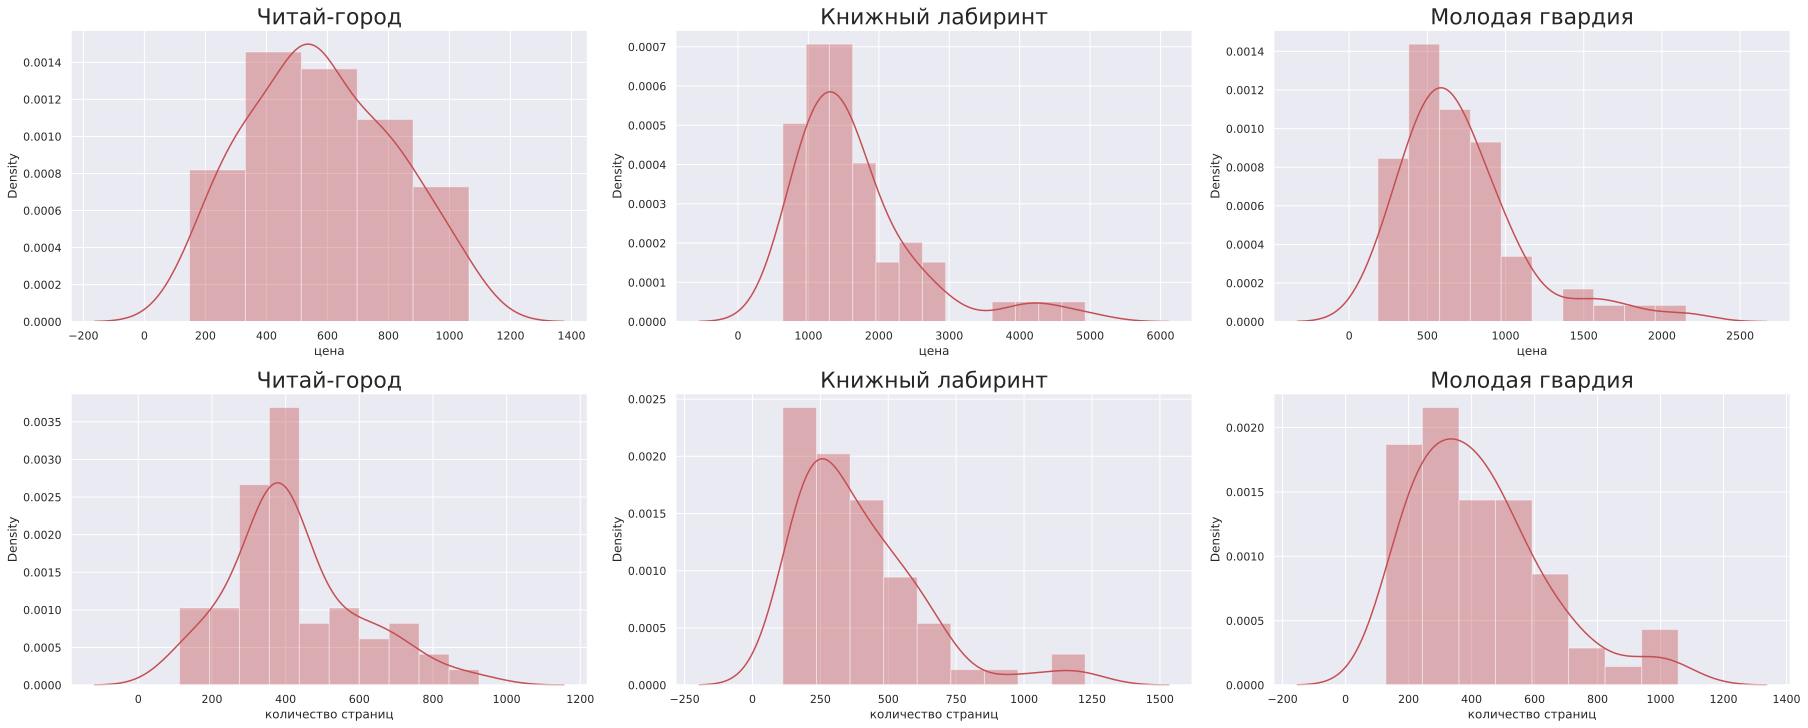

In [17]:
name = 'Магазин'

categories = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']

needed_cols = ['цена', 'количество страниц']

template_block_structure_first(main_df2, name, categories, needed_cols, 'r', figsize=(25, 10))

plt.savefig('цена_по_магазинам_1', bbox_inches='tight', dpi=DPI_VALUE)

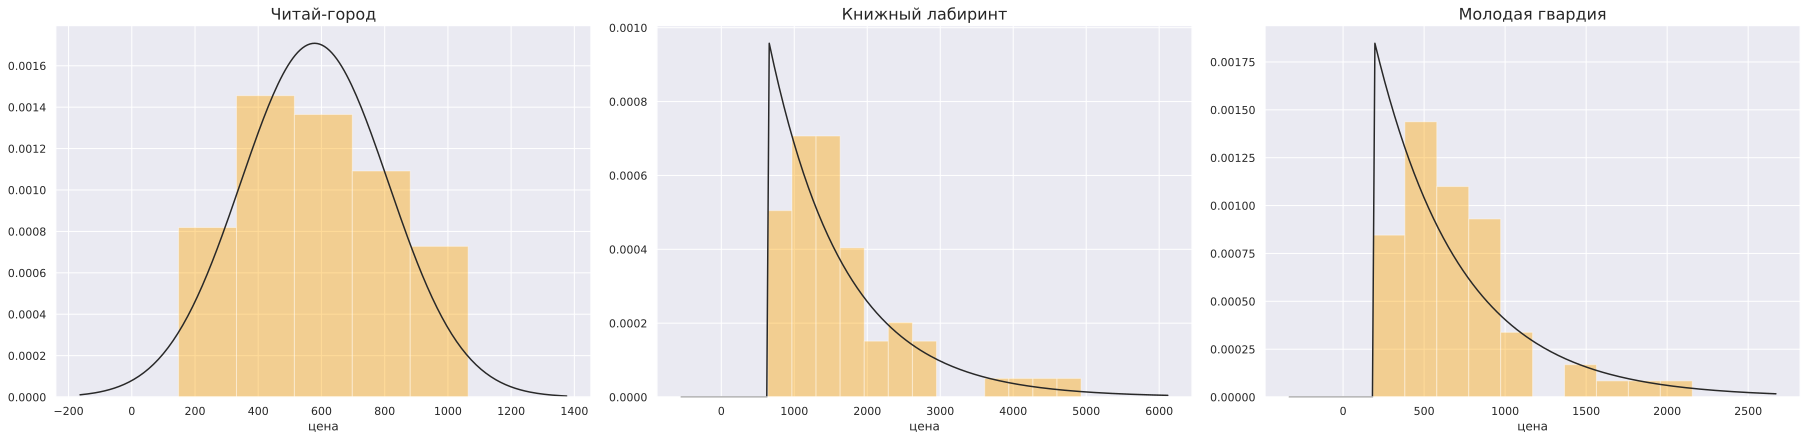

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(25, 6), constrained_layout=True)

col = 'цена'

handled_df = main_df2[main_df2['Магазин'] == 'Читай-город']
sb.distplot(handled_df[col], color='orange', fit=norm, kde=False, ax=ax[0])
ax[0].set_title('Читай-город', fontsize=16)

handled_df = main_df2[main_df2['Магазин'] == 'Книжный лабиринт']
sb.distplot(handled_df[col], color='orange', fit=expon, kde=False, ax=ax[1])
ax[1].set_title('Книжный лабиринт', fontsize=16)

handled_df = main_df2[main_df2['Магазин'] == 'Молодая гвардия']
sb.distplot(handled_df[col], color='orange', fit=expon, kde=False, ax=ax[2])
ax[2].set_title('Молодая гвардия', fontsize=16)

plt.savefig('цена_по_магазинам_2', bbox_inches='tight', dpi=DPI_VALUE)

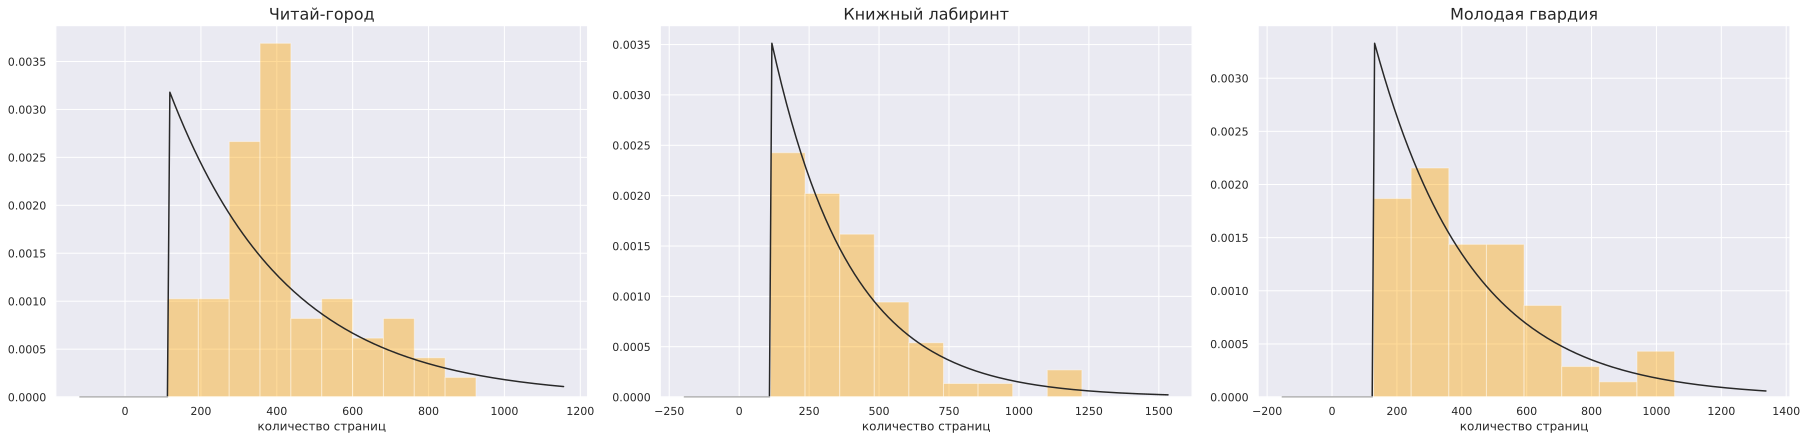

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(25, 6), constrained_layout=True)

col = 'количество страниц'

handled_df = main_df2[main_df2['Магазин'] == 'Читай-город']
sb.distplot(handled_df[col], color='orange', fit=expon, kde=False, ax=ax[0])
ax[0].set_title('Читай-город', fontsize=16)

handled_df = main_df2[main_df2['Магазин'] == 'Книжный лабиринт']
sb.distplot(handled_df[col], color='orange', fit=expon, kde=False, ax=ax[1])
ax[1].set_title('Книжный лабиринт', fontsize=16)

handled_df = main_df2[main_df2['Магазин'] == 'Молодая гвардия']
sb.distplot(handled_df[col], color='orange', fit=expon, kde=False, ax=ax[2])
ax[2].set_title('Молодая гвардия', fontsize=16)

plt.savefig('количество_страниц_2', bbox_inches='tight', dpi=DPI_VALUE)

In [20]:
category = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

for cat in category:
    data = main_df2[main_df2['категория книг'] == cat]['цена']

    print(stats.anderson(data, 'expon'))

AndersonResult(statistic=7.878628691442046, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=5.903412976964987, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=2.0628528047518913, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [21]:
category = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

data = main_df2[main_df2['категория книг'] == cat]['цена']

print(stats.anderson(data, 'expon'))

AndersonResult(statistic=2.0628528047518913, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [22]:
data = main_df2[main_df2['категория книг'] == 'популярные бестселлеры']['количество страниц']

print(stats.anderson(data, 'norm'))

data = main_df2[main_df2['категория книг'] == 'научно-популярная литература']['количество страниц']

print(stats.anderson(data, 'expon'))

AndersonResult(statistic=0.28356505774731744, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=7.115406219917034, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [23]:
category = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']

for cat in category:
    data = main_df2[main_df2['Магазин'] == cat]['цена']

    print('Expon', stats.anderson(data, 'expon'))

Expon AndersonResult(statistic=9.301170323596537, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Expon AndersonResult(statistic=9.004572507933105, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Expon AndersonResult(statistic=7.4667759895297365, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [24]:
data = main_df2[main_df2['Магазин'] == 'Читай-город']['цена']

print('Norm', stats.anderson(data, 'norm'))
print('Norm', stats.shapiro(data))

Norm AndersonResult(statistic=0.358696641125519, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Norm ShapiroResult(statistic=0.9757048487663269, pvalue=0.2744407057762146)


In [25]:
category = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']

for cat in category:
    data = main_df2[main_df2['Магазин'] == cat]['количество страниц']

    print('Expon', stats.anderson(data, 'expon'))

Expon AndersonResult(statistic=10.169525289184804, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Expon AndersonResult(statistic=6.351855648434494, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Expon AndersonResult(statistic=7.706267562281411, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [26]:
category = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

for cat in category:
    data = main_df2[main_df2['категория книг'] == cat]['количество страниц']

    print('Norm', stats.anderson(data, 'norm'))
    print('Norm', stats.shapiro(data))

Norm AndersonResult(statistic=0.28356505774731744, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Norm ShapiroResult(statistic=0.978938102722168, pvalue=0.3852917551994324)
Norm AndersonResult(statistic=1.1852562484338733, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Norm ShapiroResult(statistic=0.9185831546783447, pvalue=0.0006728442967869341)
Norm AndersonResult(statistic=1.1002655715444405, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Norm ShapiroResult(statistic=0.9405730962753296, pvalue=0.005744929891079664)


In [27]:
category = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']

for cat in category:
    data = main_df2[main_df2['Магазин'] == cat]['количество страниц']

    print('Norn', stats.anderson(data, 'norm'))
    print('Norn', stats.shapiro(data))

Norn AndersonResult(statistic=1.28569395190177, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Norn ShapiroResult(statistic=0.9476977586746216, pvalue=0.01215583086013794)
Norn AndersonResult(statistic=2.1408983415802396, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Norn ShapiroResult(statistic=0.8556185364723206, pvalue=4.47979937234777e-06)
Norn AndersonResult(statistic=1.2291972886268354, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Norn ShapiroResult(statistic=0.9185219407081604, pvalue=0.0006690665031783283)


In [28]:
main_df2.columns.shape

(13,)

In [30]:
!pip install pingouin --quiet
import pingouin as pg

data = np.delete(main_data2, 1, axis=1).astype('float64')

     |████████████████████████████████| 185 kB 4.4 MB/s 
     |████████████████████████████████| 9.8 MB 59.4 MB/s 


In [31]:
df2 = pd.DataFrame(data)

In [33]:
cols = ['категория книг', 'Магазин', 'цена', 'количество страниц',
       'визуальная привлекательность (1 - 5)', 'качество обложки (1 - 5)',
       'качество переплёта (1 - 5)', 'качество бумаги (1 - 5)',
       'качество печати (1 - 5)', 'формат книги (0-3)', 'размер книги (0-3)',
       'эксперт']

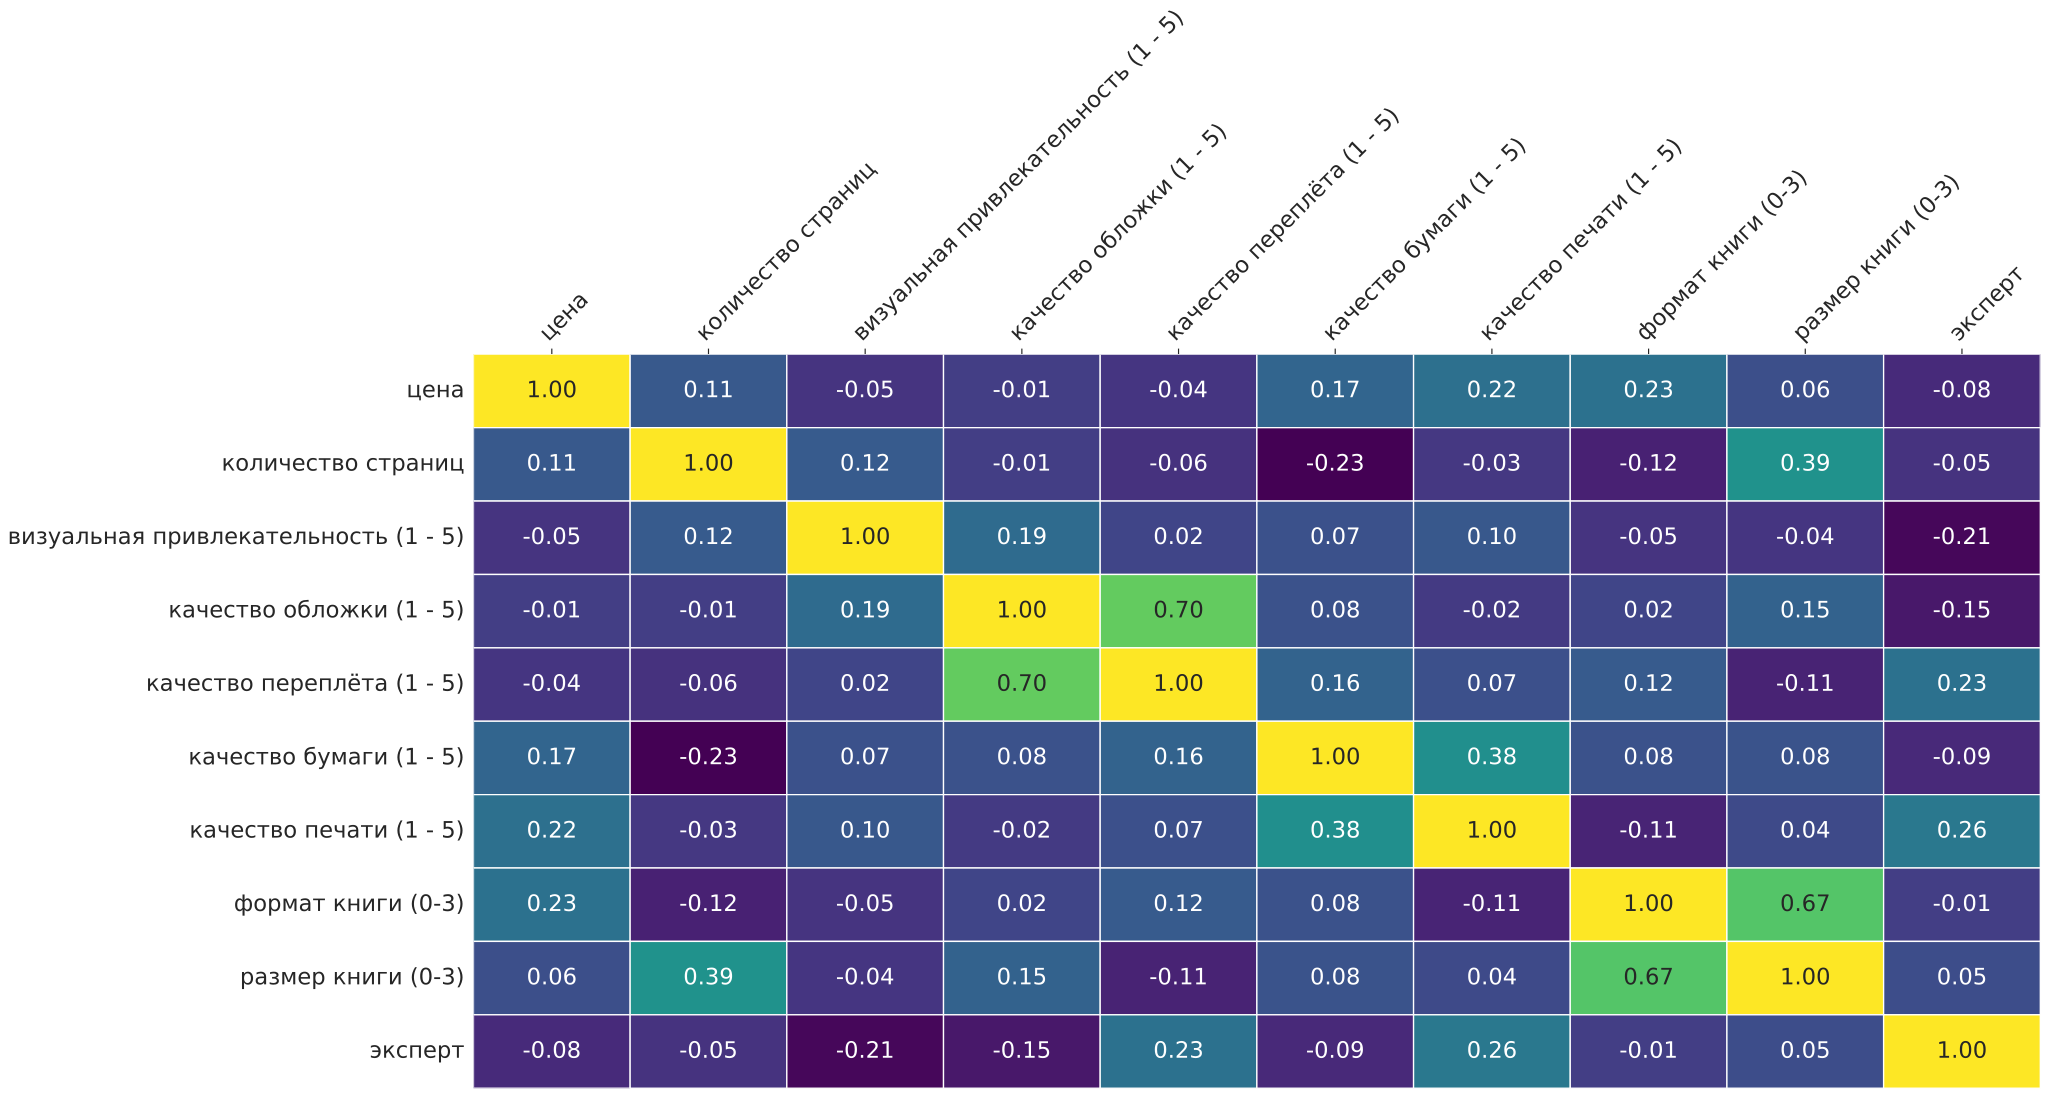

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(30, 16), constrained_layout=True)

sb.set(font_scale=2) # font size 2

ax.xaxis.tick_top()
ax.tick_params(axis = 'y', which = 'major', labelsize = 24)
ax.tick_params(axis = 'y', which = 'minor', labelsize = 24)
sb.heatmap(main_df2[cols].pcorr(), annot=True, fmt=".2f", cmap='viridis', cbar=False, ax=ax, xticklabels='auto', yticklabels='auto', linewidths=1.4)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, size = 24, ha="left", rotation_mode='anchor')

plt.savefig('частные_корреляции_1', bbox_inches='tight', dpi=DPI_VALUE)

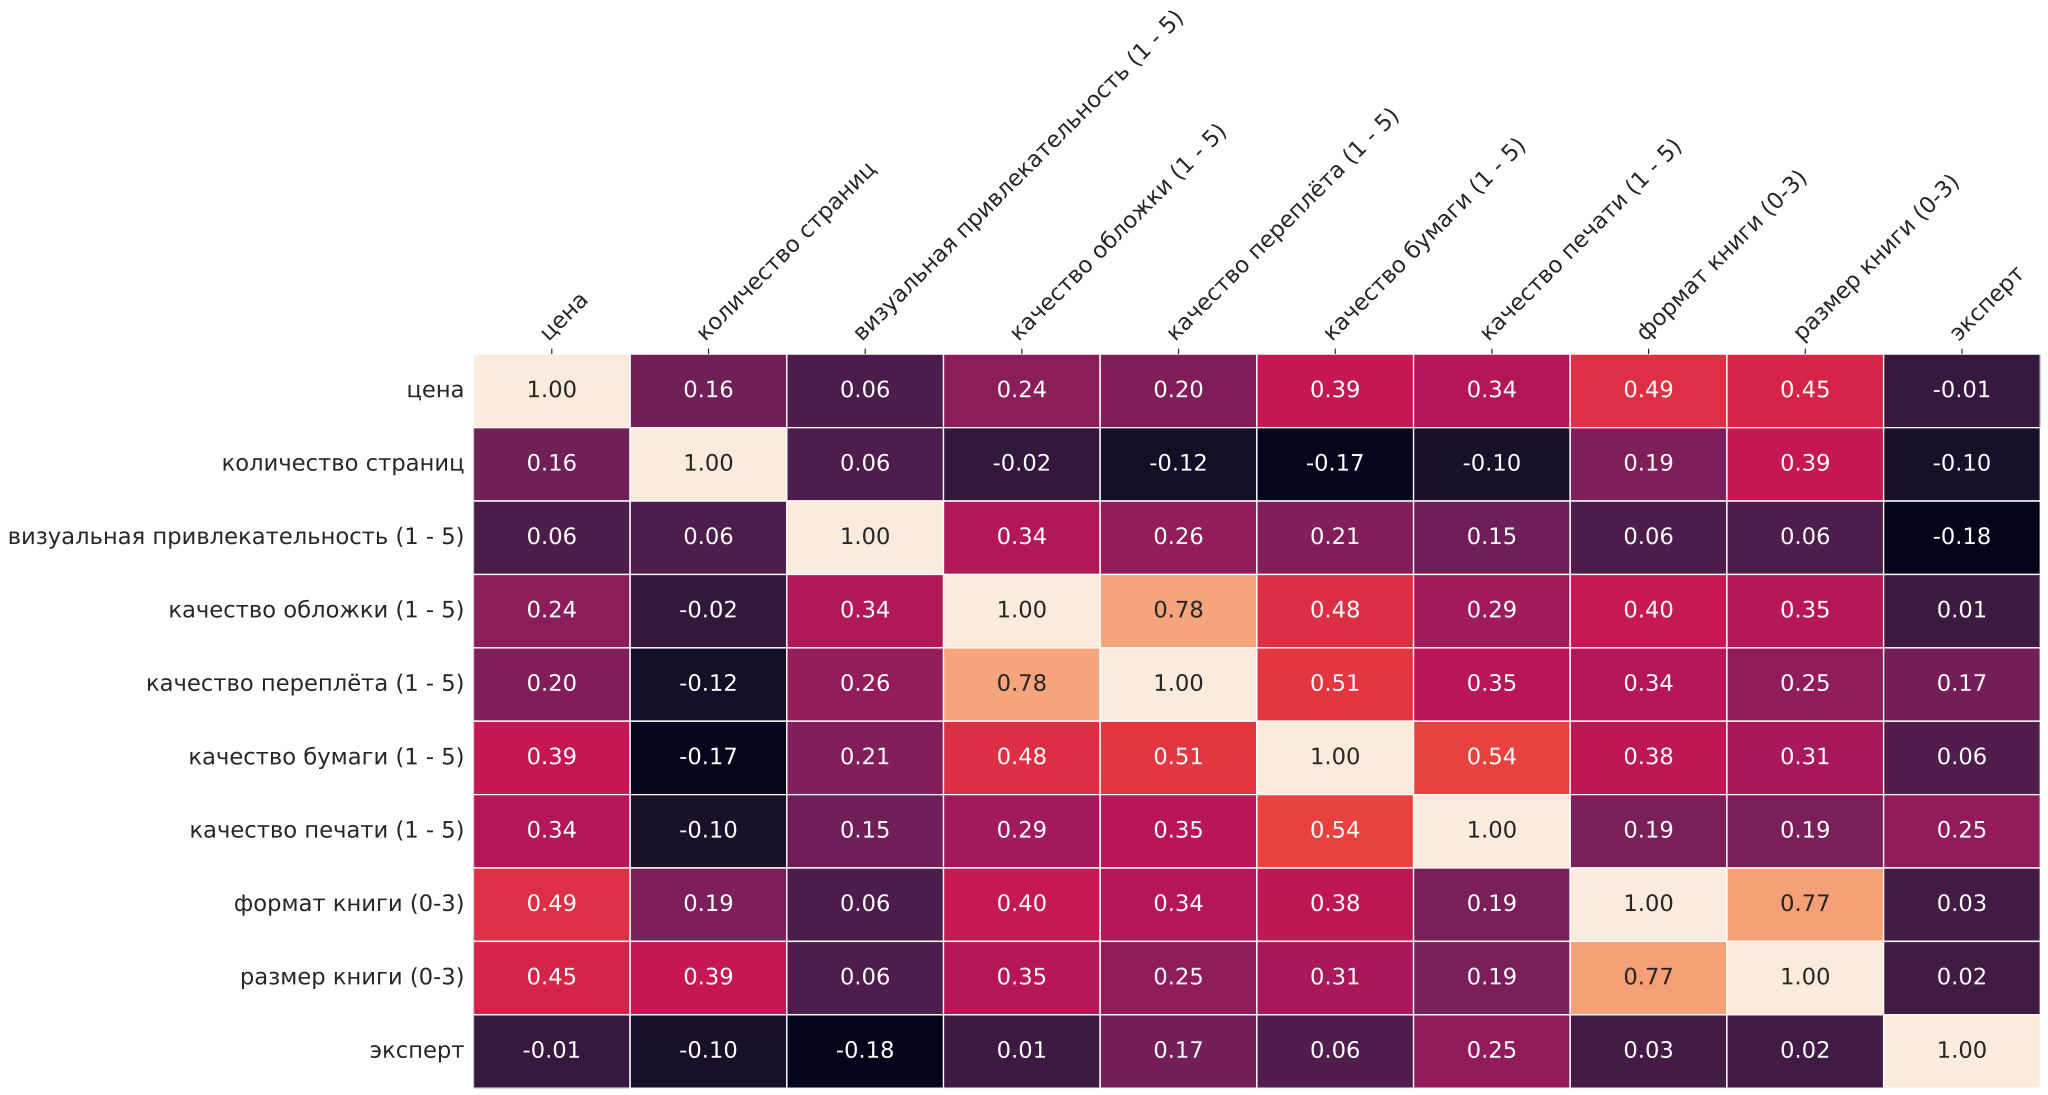

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(30, 16), constrained_layout=True)

ax.xaxis.tick_top()
ax.tick_params(axis = 'y', which = 'major', labelsize = 24)
ax.tick_params(axis = 'y', which = 'minor', labelsize = 24)
sb.heatmap(main_df2[cols].corr(), annot=True, fmt=".2f", cbar=False, ax=ax, xticklabels='auto', yticklabels='auto', linewidths=1.4)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, size = 24, ha="left", rotation_mode='anchor')

plt.savefig('корреляции_1', bbox_inches='tight', dpi=DPI_VALUE)

In [36]:
cols = ['категория книг', 'Магазин', 'цена', 'количество страниц',
       'визуальная привлекательность (1 - 5)', 'качество обложки (1 - 5)',
       'качество переплёта (1 - 5)', 'качество бумаги (1 - 5)',
       'качество печати (1 - 5)', 'формат книги (0-3)', 'размер книги (0-3)',
       'эксперт']

In [37]:
data0 = data[:, cols.index('цена')] / data[:, cols.index('количество страниц')]
data0.shape

(180,)

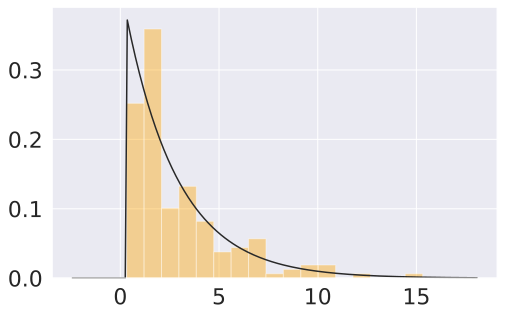

In [38]:
sb.distplot(data0, color='orange', fit=expon, kde=False)

In [39]:
!pip install hyppo --quiet
import hyppo

     |████████████████████████████████| 84 kB 1.9 MB/s 


In [40]:
def tester(data0, data1, method='Hsic', end='\n'):
    print(hyppo.ksample.KSample(method).test(data0, data1), end=end)
    #print(stats.anderson_ksamp((data0, data1)), end=end)
    print(stats.ks_2samp(data0, data1), end=end)

In [41]:
def get_data00(category, cat):
    return np.array(main_df2[main_df2[category] == cat]['цена'] / np.array(main_df2[main_df2[category] == cat]['количество страниц']))

In [42]:
def get_data01(category, cat):
    return np.array(main_df2[main_df2[category] == cat]['цена'])

In [43]:
def get_data02(category, cat):
    return np.array(np.array(main_df2[main_df2[category] == cat]['количество страниц']))

In [44]:
categories = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']
category = 'Магазин'
cat = 'Читай-город'; col = 'цен'
data0 = get_data00(category, categories[0])
data1 = get_data00(category, categories[1])
data2 = get_data00(category, categories[2])
#indep_test ("CCA", "Dcorr", "HHG", "RV", "Hsic", "MGC", "KMERF", or list) 
method = 'HHG'
print(data0.shape, data1.shape, data2.shape)

tester(data0, data1, method)
print()
tester(data0, data2, method)
print()
tester(data1, data2, method)

(60,) (60,) (60,)
IndependenceTestOutput(stat=153598.49168375757, pvalue=0.000999000999000999)
KstestResult(statistic=0.7333333333333333, pvalue=6.426349429505847e-16)

IndependenceTestOutput(stat=10903.295071549204, pvalue=0.12187812187812187)
KstestResult(statistic=0.18333333333333332, pvalue=0.2671202776187836)

IndependenceTestOutput(stat=99179.06918699792, pvalue=0.000999000999000999)
KstestResult(statistic=0.5666666666666667, pvalue=3.1578017116651398e-09)


In [45]:
def get_data10(category0, cat0, category1, cat1):
    return np.array(main_df2[(main_df2[category0] == cat0) & (main_df2[category1] == cat1)]['цена'] /
                    main_df2[(main_df2[category0] == cat0) & (main_df2[category1] == cat1)]['количество страниц'])

In [46]:
def get_data11(category0, cat0, category1, cat1):
    return np.array(main_df2[(main_df2[category0] == cat0) & (main_df2[category1] == cat1)]['цена'])

In [47]:
def get_data12(category0, cat0, category1, cat1):
    return np.array(main_df2[(main_df2[category0] == cat0) & (main_df2[category1] == cat1)]['количество страниц'])

In [48]:
np.array(main_df2[(main_df2['Магазин'] == 'Читай-город') & (main_df2['категория книг'] == 'классика')]['цена'])

array([815., 256., 926., 722., 259., 245., 421., 338., 350., 580., 350.,
       613., 368., 316., 473., 553., 524., 148., 592., 215.])

In [49]:
categories0 = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']
categories1 = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

category0 = 'Магазин'
category1 = 'категория книг'
method = 'HHG'

for i in range(len(categories0)):
    for j in range(i + 1, len(categories0)):
        print(f"Однородность {categories0[i]} и {categories0[j]} на категориях книг в порядке {categories1}\n")
        for cat in categories1:
            print(cat)
            data0 = get_data10(category0, categories0[i], category1, cat)
            data1 = get_data10(category0, categories0[j], category1, cat)
            tester(data0, data1, method)
            print()
        print()

Однородность Читай-город и Книжный лабиринт на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
IndependenceTestOutput(stat=7103.526340056542, pvalue=0.000999000999000999)
KstestResult(statistic=0.85, pvalue=1.4334782434603487e-07)

научно-популярная литература
IndependenceTestOutput(stat=4168.190325419468, pvalue=0.000999000999000999)
KstestResult(statistic=0.7, pvalue=5.569062975843453e-05)

классика
IndependenceTestOutput(stat=8067.265210003363, pvalue=0.000999000999000999)
KstestResult(statistic=0.95, pvalue=5.803555641539872e-10)


Однородность Читай-город и Молодая гвардия на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
IndependenceTestOutput(stat=305.32448724766755, pvalue=0.962037962037962)
KstestResult(statistic=0.15, pvalue=0.9831368772656193)

научно-популярная литература
IndependenceTestOutput(stat=1254.192548616607, pvalue=0.10

In [50]:
categories = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']
category = 'Магазин'
cat = 'Читай-город'; col = 'цен'
data0 = get_data01(category, categories[0])
data1 = get_data01(category, categories[1])
data2 = get_data01(category, categories[2])
#indep_test ("CCA", "Dcorr", "HHG", "RV", "Hsic", "MGC", "KMERF", or list) 
method = 'HHG'
print(data0.shape, data1.shape, data2.shape)

tester(data0, data1, method)
print()
tester(data0, data2, method)
print()
tester(data1, data2, method)

(60,) (60,) (60,)
IndependenceTestOutput(stat=177012.89755610414, pvalue=0.000999000999000999)
KstestResult(statistic=0.8, pvalue=2.1824498281334145e-19)

IndependenceTestOutput(stat=7887.075653247674, pvalue=0.32167832167832167)
KstestResult(statistic=0.18333333333333332, pvalue=0.2671202776187836)

IndependenceTestOutput(stat=123945.8162047578, pvalue=0.000999000999000999)
KstestResult(statistic=0.6833333333333333, pvalue=1.2077027208573093e-13)


In [51]:
categories0 = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']
categories1 = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

category0 = 'Магазин'
category1 = 'категория книг'
method = 'HHG'

for i in range(len(categories0)):
    for j in range(i + 1, len(categories0)):
        print(f"Однородность {categories0[i]} и {categories0[j]} на категориях книг в порядке {categories1}\n")
        for cat in categories1:
            print(cat)
            data0 = get_data11(category0, categories0[i], category1, cat)
            data1 = get_data11(category0, categories0[j], category1, cat)
            tester(data0, data1, method)
            print()
        print()

Однородность Читай-город и Книжный лабиринт на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
IndependenceTestOutput(stat=7555.914523527331, pvalue=0.000999000999000999)
KstestResult(statistic=0.85, pvalue=1.4334782434603487e-07)

научно-популярная литература
IndependenceTestOutput(stat=5288.886668626885, pvalue=0.000999000999000999)
KstestResult(statistic=0.8, pvalue=1.3259673752008224e-06)

классика
IndependenceTestOutput(stat=7372.407656615556, pvalue=0.000999000999000999)
KstestResult(statistic=0.9, pvalue=1.1316933501002751e-08)


Однородность Читай-город и Молодая гвардия на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
IndependenceTestOutput(stat=310.7480973732381, pvalue=0.954045954045954)
KstestResult(statistic=0.15, pvalue=0.9831368772656193)

научно-популярная литература
IndependenceTestOutput(stat=1327.734188381768, pvalue=0.09

In [52]:
cols = list(main_df2.columns)
cols

['категория книг',
 'название',
 'Магазин',
 'цена',
 'количество страниц',
 'визуальная привлекательность (1 - 5)',
 'качество обложки (1 - 5)',
 'качество переплёта (1 - 5)',
 'качество бумаги (1 - 5)',
 'качество печати (1 - 5)',
 'формат книги (0-3)',
 'размер книги (0-3)',
 'эксперт']

In [53]:
shop = main_data2[:, cols.index('Магазин')]
book_type = main_data2[:, cols.index('категория книг')]
price = main_data2[:, cols.index('цена')]

tmp_df = pd.DataFrame({'shop' : shop, 'book_type' : book_type, 'price' : price}).astype('float64')

import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('price ~ C(shop) + C(book_type) + C(shop):C(book_type)', data=tmp_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(shop),41981804.8,2.0,67.923662,1.946737e-22
C(book_type),1652733.1,2.0,2.674008,7.185930e-02
C(shop):C(book_type),5285373.4,4.0,4.275685,2.532652e-03
Residual,52845270.9,171.0,NaN,NaN


In [54]:
shop = main_data2[:, cols.index('категория книг')]
book_type = main_data2[:, cols.index('формат книги (0-3)')]
price = main_data2[:, cols.index('цена')]

tmp_df = pd.DataFrame({'book_type' : shop, 'book_format' : book_type, 'price' : price}).astype('float64')

import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('price ~ C(book_type) + C(book_format) + C(book_format):C(book_type)', data=tmp_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(book_type),7.869265e+05,2.0,0.959391,3.852028e-01
C(book_format),4.517368e+06,3.0,3.671603,1.345107e-02
C(book_format):C(book_type),2.628518e+07,6.0,10.681962,4.716992e-10
Residual,6.930991e+07,169.0,NaN,NaN


In [55]:
cand = main_data2[:, cols.index('качество бумаги (1 - 5)')]
price = main_data2[:, cols.index('качество обложки (1 - 5)')] #/ main_data2[:, cols.index('количество страниц')]

stats.kruskal(price, cand)

KruskalResult(statistic=5.733530227962908, pvalue=0.01664399134656386)

In [56]:
cols = ['категория книг', 'Магазин', 
       'визуальная привлекательность (1 - 5)', 'качество обложки (1 - 5)',
       'качество переплёта (1 - 5)', 'качество бумаги (1 - 5)',
       'качество печати (1 - 5)', 'формат книги (0-3)', 'размер книги (0-3)']
range_lst =[range(3), range(3), range(1, 6), range(1, 6), range(1, 6), range(1, 6), range(1, 6), range(4), range(4)]

In [57]:
mask = main_data2[:, 5] == 3

price = main_data2[:, 3][mask]
price

array([579.0, 579.0, 531.0, 781.0, 497.0, 603.0, 890.0, 815.0, 256.0,
       722.0, 338.0, 1070.0, 920.0, 1010.0, 1330.0, 1470.0, 1520.0, 184.0,
       227.0, 908.0, 218.0, 530.0, 793.0, 493.0, 322.0, 1147.0, 420.0,
       1066.0, 545.0, 577.0, 340.0, 730.0, 545.0, 896.0, 360.0, 677.0,
       508.0, 713.0, 368.0, 473.0, 148.0, 592.0, 215.0, 513.0, 725.0,
       2920.0, 780.0, 1340.0, 780.0, 1450.0, 2780.0, 1680.0], dtype=object)

In [58]:
for i, col in enumerate(cols):
    compare_data = list()
    index = list(main_df2.columns).index(col)

    work_data = main_data2[:, index]
    for j in range_lst[i]:
        mask =  work_data == j

        price = main_data2[:, 3][mask]

        compare_data.append(price)
    compare_data = np.array(compare_data)
    print(col)
    print(stats.kruskal((*compare_data)))
    print()

категория книг
KruskalResult(statistic=10.021997867512832, pvalue=0.006664242842991517)

Магазин
KruskalResult(statistic=92.7032247438477, pvalue=7.408845179572042e-21)

визуальная привлекательность (1 - 5)
KruskalResult(statistic=11.383471028690673, pvalue=0.022576127085352882)

качество обложки (1 - 5)
KruskalResult(statistic=24.50273521496114, pvalue=6.332268977901043e-05)

качество переплёта (1 - 5)
KruskalResult(statistic=24.19045366297796, pvalue=7.315141903679562e-05)

качество бумаги (1 - 5)
KruskalResult(statistic=41.13176709174927, pvalue=2.5241636966767687e-08)

качество печати (1 - 5)
KruskalResult(statistic=30.828625773564085, pvalue=3.317964068343364e-06)

формат книги (0-3)
KruskalResult(statistic=49.52691752733196, pvalue=1.0074992273305473e-10)

размер книги (0-3)
KruskalResult(statistic=36.97124973223985, pvalue=4.666279906451539e-08)



In [59]:
compare_data = list()
index = list(main_df2.columns).index('Магазин')

work_data = main_data2[:, index]
for j in range(0, 3):
    mask =  work_data == j
    
    price = main_data2[:, 3][mask]

    compare_data.append(price)
compare_data = np.array(compare_data)

compare_data.shape

(3, 60)

In [60]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [61]:
!mkdir price

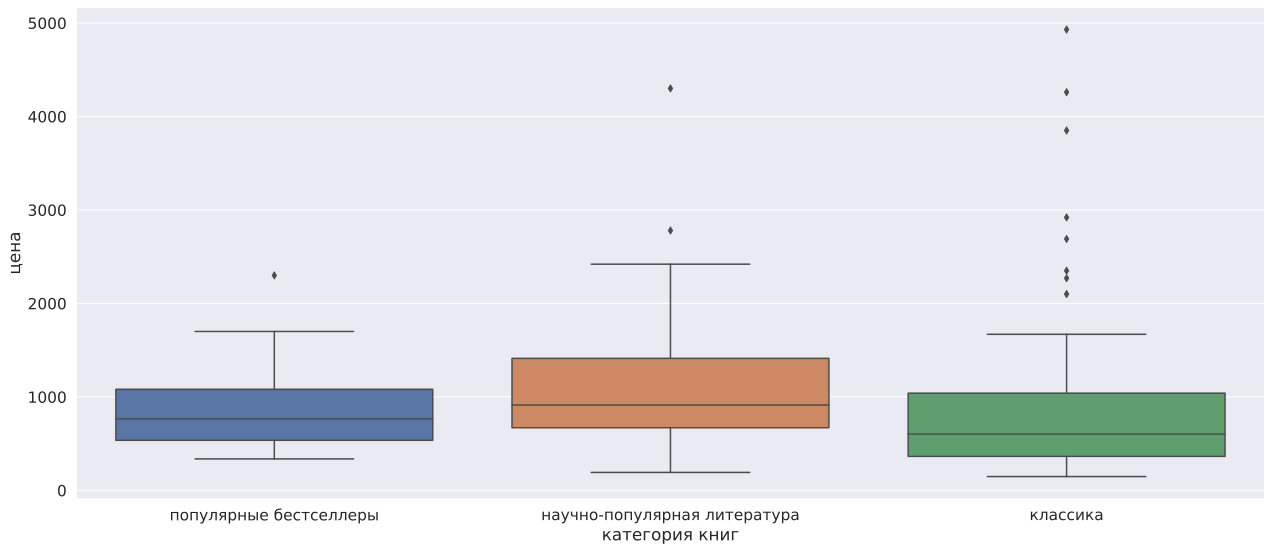

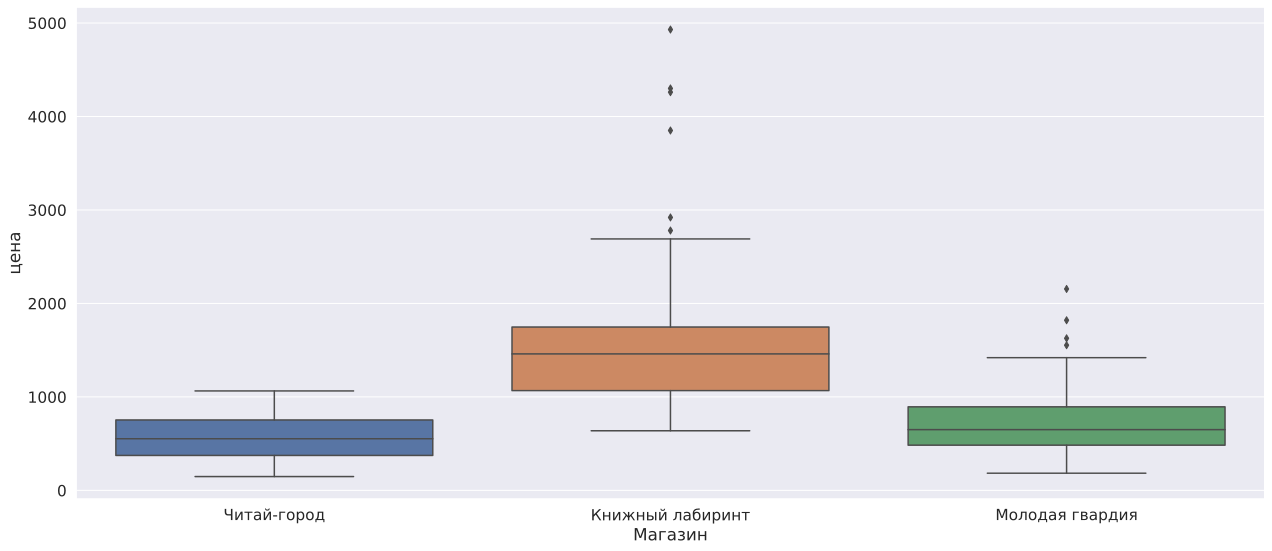

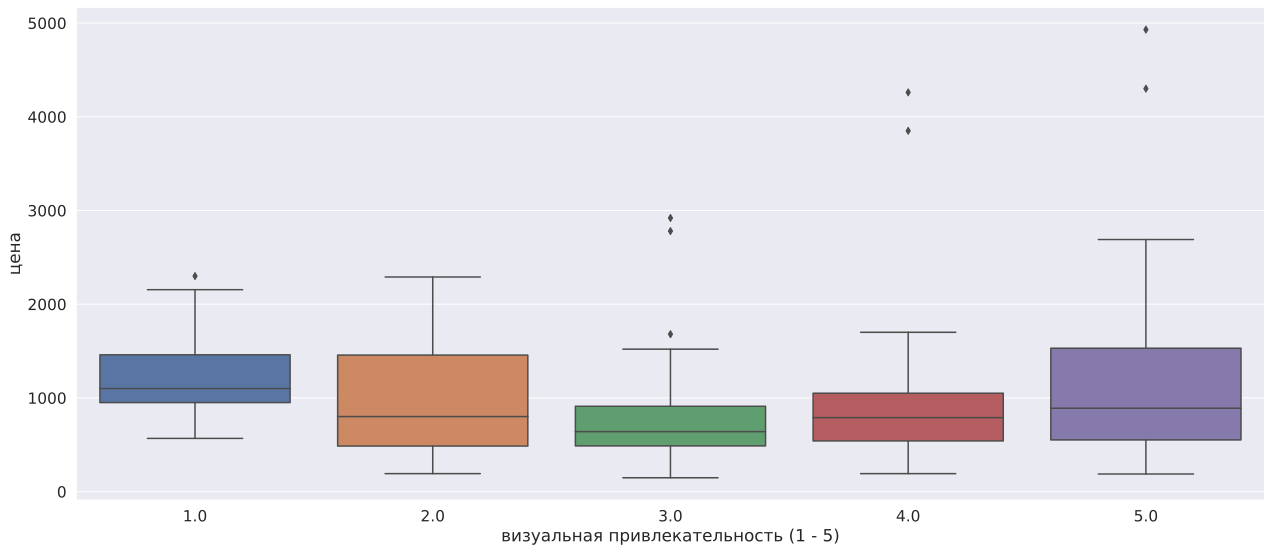

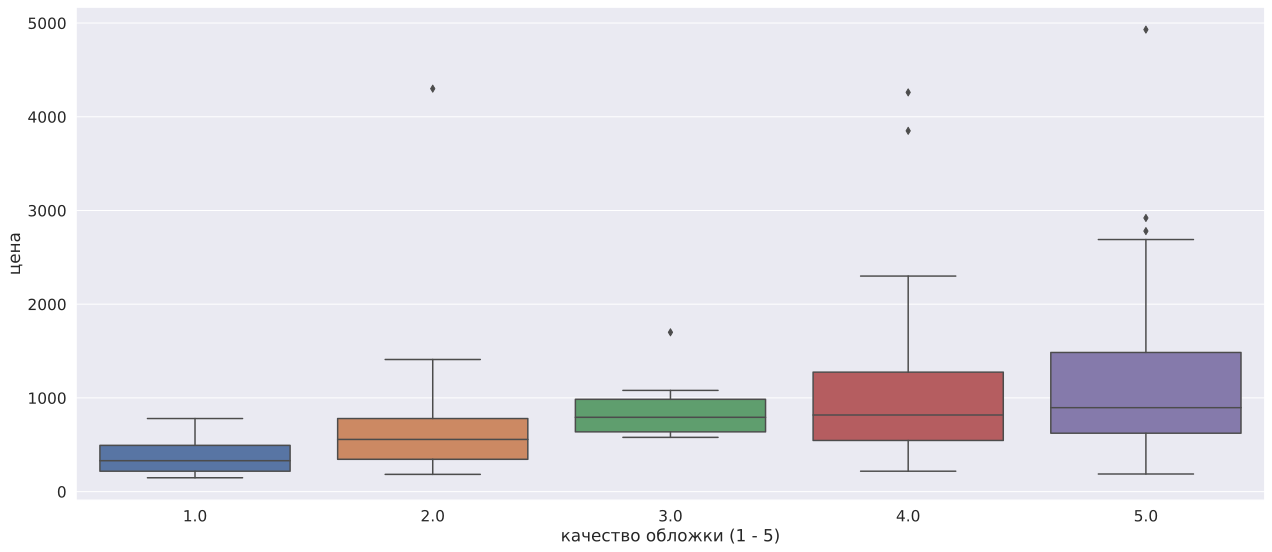

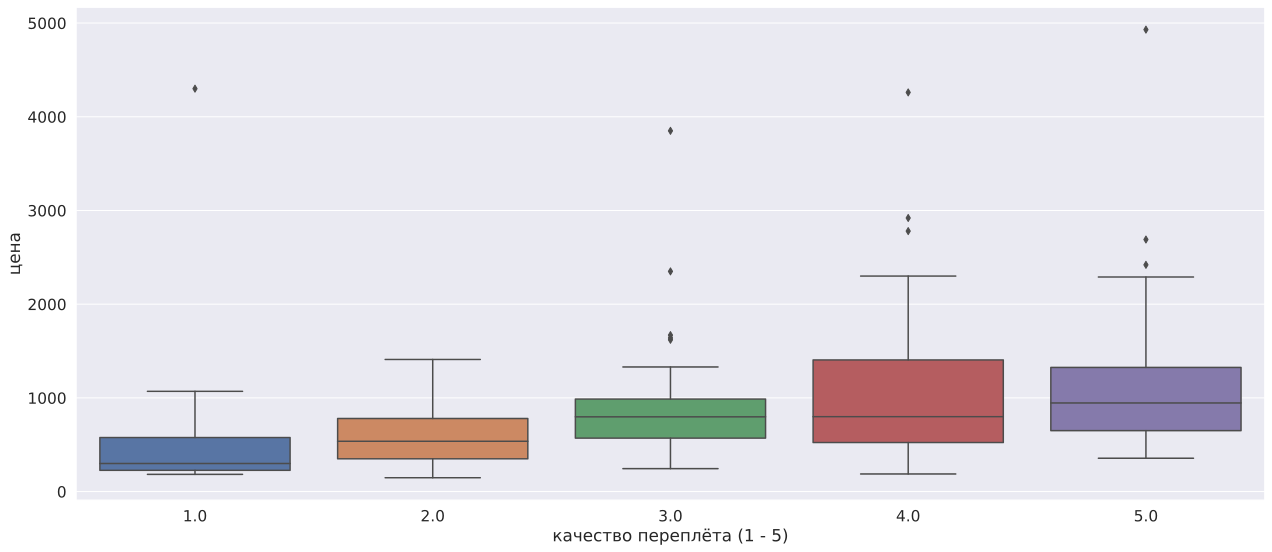

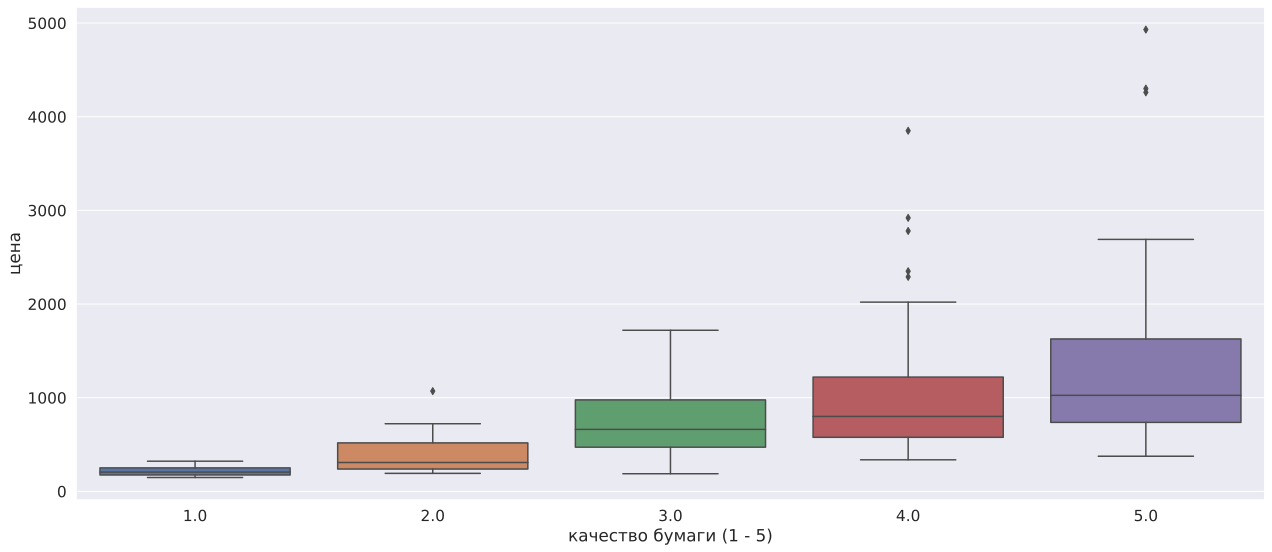

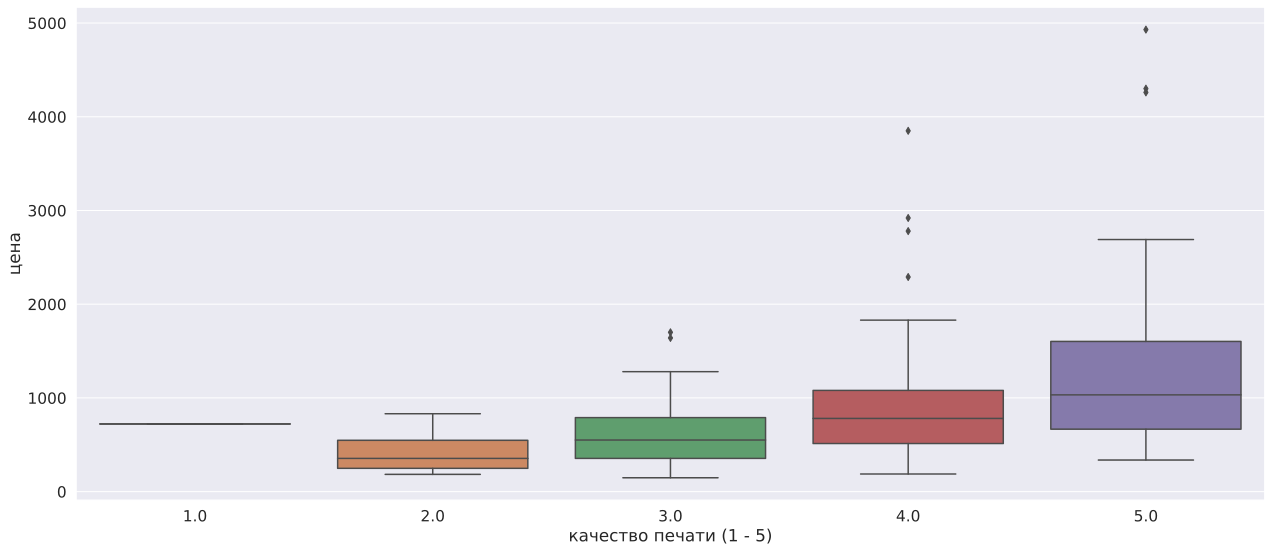

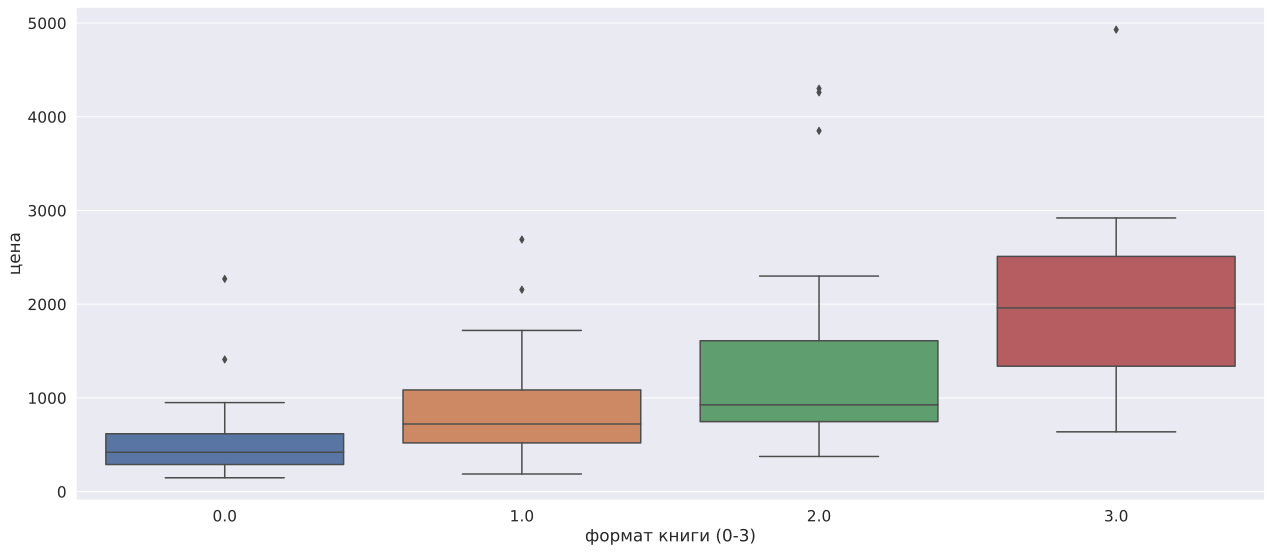

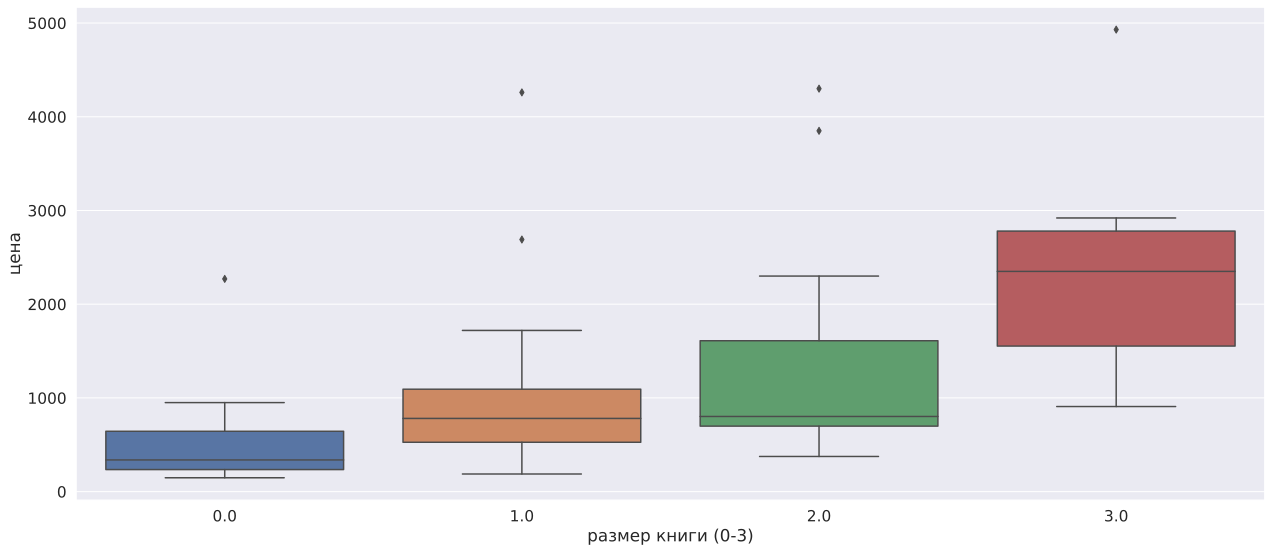

In [62]:
for col in cols:
    sb.set(font_scale=1.4) # font size 2
    plt.figure(figsize=(18, 8))
    sb.boxplot(x=col, y="цена", data=main_df2)

    plt.savefig(f"price/{col}_цена", bbox_inches='tight', dpi=DPI_VALUE)
    plt.tight_layout()

In [63]:
categories = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']
category = 'Магазин'
cat = 'Читай-город'
data0 = get_data01(category, categories[0])
data1 = get_data01(category, categories[1])
data2 = get_data01(category, categories[2])

In [64]:
stats.mannwhitneyu(data0, data1, alternative='greater')

MannwhitneyuResult(statistic=114.0, pvalue=1.0)

In [65]:
stats.mannwhitneyu(data2, data1, alternative='greater')

MannwhitneyuResult(statistic=351.5, pvalue=0.9999999999999858)

In [66]:
stats.mannwhitneyu(data0, data2, alternative='greater')

MannwhitneyuResult(statistic=1492.5, pvalue=0.9470186268031403)

In [67]:
categories0 = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']
categories1 = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

category0 = 'Магазин'
category1 = 'категория книг'
method = 'HHG'

for i in range(len(categories0)):
    for j in range(i + 1, len(categories0)):
        print(f"Доминирование {categories0[i]} и {categories0[j]} на категориях книг в порядке {categories1}\n")
        for cat in categories1:
            print(cat)
            data0 = get_data10(category0, categories0[i], category1, cat)
            data1 = get_data10(category0, categories0[j], category1, cat)
            print(stats.mannwhitneyu(data0, data1, alternative='greater'))
            print()
        print()

Доминирование Читай-город и Книжный лабиринт на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
MannwhitneyuResult(statistic=9.0, pvalue=0.9999998892561375)

научно-популярная литература
MannwhitneyuResult(statistic=58.0, pvalue=0.9999420494292661)

классика
MannwhitneyuResult(statistic=1.0, pvalue=0.9999999660219243)


Доминирование Читай-город и Молодая гвардия на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
MannwhitneyuResult(statistic=196.0, pvalue=0.5484417520052178)

научно-популярная литература
MannwhitneyuResult(statistic=144.0, pvalue=0.9367846913166159)

классика
MannwhitneyuResult(statistic=163.0, pvalue=0.8447988719269208)


Доминирование Книжный лабиринт и Молодая гвардия на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
MannwhitneyuResult(statistic=382.

In [68]:
categories0 = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']
categories1 = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

category0 = 'Магазин'
category1 = 'категория книг'
method = 'HHG'

for i in range(len(categories0)):
    for j in range(i + 1, len(categories0)):
        print(f"Доминирование {categories0[i]} и {categories0[j]} на категориях книг в порядке {categories1}\n")
        for cat in categories1:
            print(cat)
            data0 = get_data11(category0, categories0[i], category1, cat)
            data1 = get_data11(category0, categories0[j], category1, cat)
            print(stats.mannwhitneyu(data0, data1, alternative='greater'))
            print()
        print()

Доминирование Читай-город и Книжный лабиринт на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
MannwhitneyuResult(statistic=8.0, pvalue=0.9999999046179009)

научно-популярная литература
MannwhitneyuResult(statistic=26.0, pvalue=0.9999988234518901)

классика
MannwhitneyuResult(statistic=6.0, pvalue=0.9999999288405959)


Доминирование Читай-город и Молодая гвардия на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
MannwhitneyuResult(statistic=181.0, pvalue=0.7010858951467221)

научно-популярная литература
MannwhitneyuResult(statistic=117.5, pvalue=0.9876277421537373)

классика
MannwhitneyuResult(statistic=182.0, pvalue=0.6916209154555859)


Доминирование Книжный лабиринт и Молодая гвардия на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
MannwhitneyuResult(statistic=392.

In [78]:
xl = pd.ExcelFile('/content/Книжный АД :D.xlsx')
main_df = xl.parse('Лист2') 
main_df.shape

(180, 13)

In [79]:
reg_cols = ['категория книг',
            'количество страниц',
            'визуальная привлекательность (1 - 5)',
            'качество обложки (1 - 5)',
            'качество переплёта (1 - 5)',
            'качество бумаги (1 - 5)',
            'качество печати (1 - 5)',
            'формат книги (0-3)',
            'размер книги (0-3)']

In [80]:
reg_df = np.array(main_df[reg_cols])

reg_df[reg_df == 'популярные бестселлеры'] = 1.
reg_df[reg_df == 'научно-популярная литература'] = 2.
reg_df[reg_df == 'классика'] = 3.

reg_data = reg_df.astype('float16')

reg_data[:, -2:] += 1.

price_col = np.array(main_df['цена'])
perm = np.array([ 80, 136, 134, 137,   9, 149, 160,  83, 110, 105,  58, 148,  87,
        97,  64, 161, 127, 170, 108, 145, 151, 147,  82,  42,   1, 175,
         6,   0,  23,  90, 103, 168, 169, 165,  12, 104, 115,  62,  56,
       116, 144,  51,  57, 146,  47, 132,  84,  18,  50, 153, 166,  95,
       179, 177, 126, 164, 125,  74, 139, 138, 150, 100, 141,  38, 106,
         8,  75,  39,  34,   5,  89,  11,  36,  10,  70,  28,  48, 128,
        19, 113, 107,  27,  49,  21,  41, 117,  25,  20,  63, 172,  96,
        61,  91, 152,  98,  53, 171,  86,  55,  66,   4, 120, 130, 178,
        43, 143,  17,  71, 112, 121,  44, 135,   7,  24, 114, 129,  46,
         2,  73,  13, 101,  76,  29, 176,  99,  40, 155, 133,  31,  88,
        92,  32, 119,  85,  26,  14,  22, 159,  94,  35, 163,  59,  79,
        69,  45,  65, 109,  78, 111,  16,  54,  30, 118, 142,  67,  72,
       123, 174,  52, 157, 102, 131, 156,  37, 167,   3, 154,  33,  77,
        68, 158, 162,  60, 124, 140, 122,  93,  15,  81, 173])

reg_data = reg_data[perm]
price_col = price_col[perm]

In [81]:
indices = [i for i in range(144) if i not in []]

reg_data_train = reg_data[:144]
reg_data_val   = reg_data[144:]

price_train = price_col[:144]
price_val   = price_col[144:]

reg_data_train = reg_data_train[indices]
price_train = price_train[indices]

In [82]:
model = Lasso(alpha=0.5)

Liner = model.fit(reg_data_train, price_train)

a = Liner.coef_
b = Liner.intercept_

price_pred = reg_data_val @ a + b

In [83]:
Liner.coef_, Liner.intercept_

(array([ 94.59825502,   0.53702708,  -6.86764109,  16.52927809,
        -65.39807062, 184.43969066, 193.45742551, 316.27697121,
         75.10699751]), -1570.336699826867)

In [84]:
(abs(price_pred - price_val)).mean()

409.8367782222514

In [85]:
(abs(770 - price_val)).mean()

420.3888888888889

In [87]:
X = pd.DataFrame(reg_data)
y = pd.DataFrame(price_col)

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

In [88]:
def get_standartized_residuals(residuals, Xw):
    Xw = np.array(Xw)
    XTX_inverse = np.linalg.inv(Xw.T @ Xw)

    H = Xw @ XTX_inverse @ (Xw.T)
    h = np.diag(H)
    
    result = residuals/np.sqrt((residuals**2).sum()/(len(residuals) - 2 - 1)) / np.sqrt(1 - h)
    
    return result

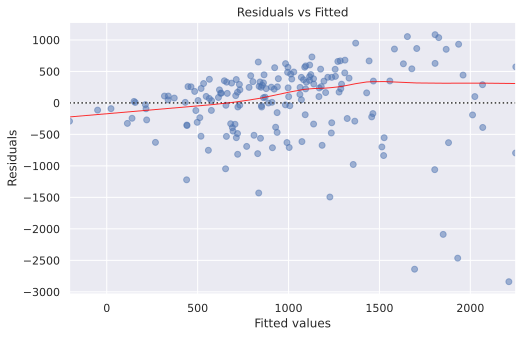

In [90]:
# model values
model_fitted_y = reg_data @ a + b
# model residuals
model_residuals = model_fitted_y - price_col
# normalized residuals
model_norm_residuals = get_standartized_residuals(model_residuals, sm.add_constant(X))
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)


plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sb.residplot(model_fitted_y, model_residuals, data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

plt.savefig('res_vs_fitted.png', dpi=DPI_VALUE)

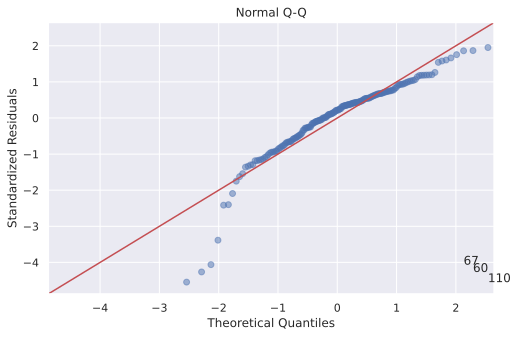

In [91]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
plt.savefig('qq_plot.png', dpi=DPI_VALUE)

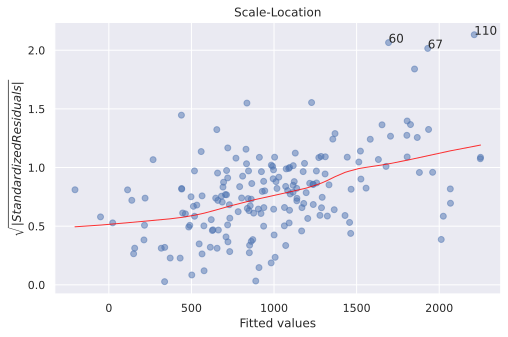

In [92]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sb.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                             xy=(model_fitted_y[i],
                                 model_norm_residuals_abs_sqrt[i]));
plt.savefig('scale_location.png', dpi=DPI_VALUE)

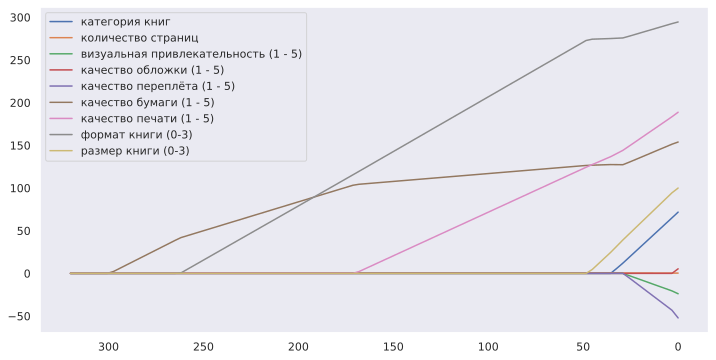

In [93]:
alpha_lst = np.linspace(0.001, 320, 100)

alpha_y = list()

X = reg_data
Y = price_col

plt.figure(figsize=(12, 6))

for alpha in alpha_lst:
    clf = Lasso(alpha=alpha)

    Liner = clf.fit(X, Y)

    a = np.array(Liner.coef_)
    b = Liner.intercept_
    Y_new = np.matmul(X, a) + b
    
    alpha_y.append(list(Liner.coef_))
alpha_y = np.array(alpha_y).T
for i, arr in enumerate(alpha_y):
    plt.plot(alpha_lst, arr, label=f"{reg_cols[i]}")
plt.grid()
plt.legend()
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.savefig('price_lambdas.png', dpi=DPI_VALUE)

In [94]:
X_ = np.array(reg_data_train)
X_[:, 1] = X_[:, 1] / X_.mean()
Y_ = np.array(price_train)
Y_ = Y_/Y_.mean()

In [95]:
def get_fitted(x, y):
    X = pd.DataFrame(x)
    Y = pd.DataFrame(y)

    # generate OLS model
    model = sm.OLS(Y, sm.add_constant(X))
    model_fit = model.fit()
    
    model_fitted_y = model_fit.fittedvalues
    
    return model_fitted_y

In [97]:
def func(lmbds):
    X = np.zeros(X_.shape)
    for i, x in enumerate(X_.T):
      X[:, i] = stats.boxcox(x, lmbds[i])
      
    num = 1
    for n in Y_:
        num *= n
    num = num**(1/len(Y_))
    y = num**(1-lmbds[-1])*stats.boxcox(Y_, lmbds[-1])
    
    fitted = get_fitted(X, y)
    
    return ((fitted - y)**2).sum()/len(fitted)

In [98]:
lmbds = scipy.optimize.minimize(func, 0.2*np.ones(len(X_[0]) + 1))

In [99]:
lmbds.x

array([ 0.2       ,  0.15835669,  0.16330711,  0.19799919,  0.1936117 ,
        0.26206826,  0.19789694,  0.2       ,  0.2       , -0.27165936])

In [100]:
X = np.zeros(X_.shape)
for i, x in enumerate(X_.T):
  X[:, i] = stats.boxcox(x, lmbds.x[i])

num = 1
for n in Y_:
    num *= n
num = num**(1/len(Y_))
    
y = num**(1-lmbds['x'][-1])*stats.boxcox(Y_, lmbds['x'][-1])

In [101]:
X = pd.DataFrame(X)
Y = pd.DataFrame(y)

# generate OLS model
model = sm.OLS(Y, sm.add_constant(X))
model_fit = model.fit()

X = pd.DataFrame(reg_data)
Y = pd.DataFrame(price_col)
# create dataframe from X, Y for easier plot handling
dataframe = pd.concat([X, Y], axis=1)

In [102]:
# model values
model_fitted_y = model_fit.predict(sm.add_constant(X))
# model residuals
model_residuals = model_fitted_y - price_col
# normalized residuals
model_norm_residuals = get_standartized_residuals(model_residuals, sm.add_constant(X))
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

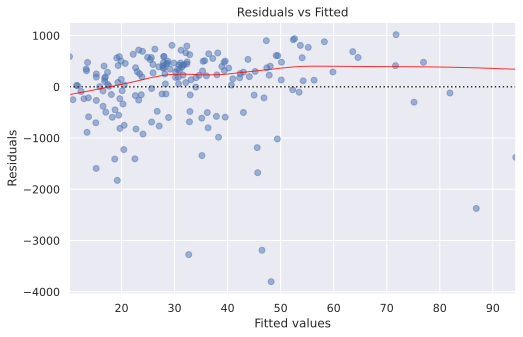

In [103]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sb.residplot(model_fitted_y, model_residuals, data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

plt.savefig('res_vs_fitted_boxcox.png', dpi=DPI_VALUE)

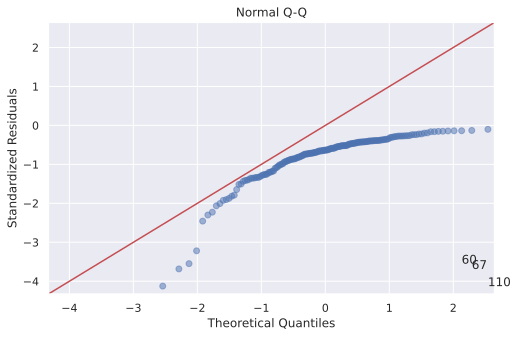

In [104]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
plt.savefig('qq_plot_boxcox.png', dpi=DPI_VALUE)

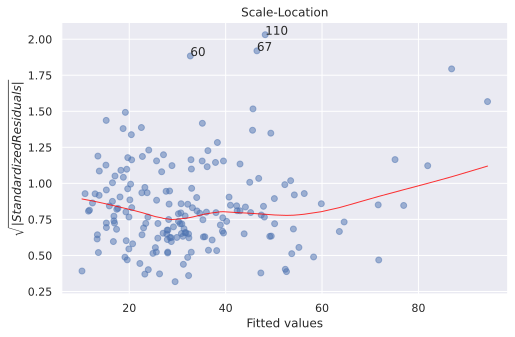

In [106]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sb.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
  plot_lm_3.axes[0].annotate(i,
                             xy=(model_fitted_y[i],
                                 model_norm_residuals_abs_sqrt[i]));
plt.savefig('scale_location_boxcox.png', dpi=DPI_VALUE)

In [108]:
ri = model_fitted_y.values - Y[0].values
stats.shapiro(ri)

ShapiroResult(statistic=0.7781564593315125, pvalue=3.1145001247473046e-15)

In [109]:
statsmodels.stats.diagnostic.het_breuschpagan(model_fit.resid, model_fit.model.exog)

(13.677774735505102,
 0.1342579249712368,
 1.5626411218107774,
 0.13272694613611274)

In [110]:
statsmodels.stats.diagnostic.acorr_breusch_godfrey(model_fit, nlags=12)

(7.930438414634285, 0.7905424901959602, 0.5925360745101896, 0.8447899918758269)

In [111]:
model_fit.params

const   -1.881466
0       -0.011717
1        0.074659
2       -0.126623
3        0.034179
4        0.027719
5        0.437120
6        0.316802
7        0.347530
8        0.122046
dtype: float64

In [112]:
def inverse_price(y):
  num = 1
  for n in Y_:
      num *= n
  num = num**(1/len(Y_))

  res = scipy.special.inv_boxcox(y/(num**(1-lmbds.x[-1])), lmbds.x[-1])

  return res * price_train.mean()

In [118]:
price_train[:5]

array([650., 524., 473., 148., 376.])

In [119]:
check_data = np.array(reg_data_val)
check_data[:, 1] /= reg_data_train.mean()

X = np.zeros(check_data.shape)
for i, x in enumerate(check_data.T):
  X[:, i] = stats.boxcox(x, lmbds.x[i])

model_fitted_y_val = model_fit.predict(sm.add_constant(X))

In [120]:
price_preds = inverse_price(np.array(model_fitted_y_val))
price_preds

array([ 476.25511075,  593.02577488,  852.90181169,  547.86308902,
        401.71387759,  893.38748183, 1143.80509974,  587.35763046,
        858.80223128,  962.59089247, 1239.55788617, 1444.90828214,
        331.44826311, 1495.40708823,  743.38790574,  765.25128601,
        446.62447809,  749.13593986,  853.92278471,  564.94284425,
       1029.36183952,  866.40071553,  744.92346732, 1129.67934708,
       1106.64741364,  572.44333258, 1639.70780845, 1131.02566796,
        180.57615085,  405.67535304,  563.44411345,  767.91880041,
        565.44643288,  869.74056068, 1247.75027964,  637.57593634])

In [121]:
abs(price_preds - price_val).mean()

339.28801242012804

In [122]:
data = np.array(main_df['Магазин'])

data[data == 'Читай-город'] = 1
data[data == 'Книжный лабиринт'] = 2
data[data == 'Молодая гвардия'] = 3

shop_cols = data[perm]

In [123]:
binary_shop_cols = np.ones((len(reg_data), 3))

for i, col in enumerate(shop_cols):
  binary_shop_cols[i, int(col - 1)] = 2

In [124]:
reg_data = np.concatenate((reg_data, binary_shop_cols), axis=1)

In [125]:
reg_data = np.delete(reg_data, 1, axis=1)

In [126]:
indices = [i for i in range(144) if i not in []]

reg_data_train = reg_data[:144]
reg_data_val   = reg_data[144:]

price_train = price_col[:144]
price_val   = price_col[144:]

reg_data_train = reg_data_train[indices]
price_train = price_train[indices]

In [127]:
model = Lasso(alpha=0.3)

Liner = model.fit(reg_data_train, price_train)

a = Liner.coef_
b = Liner.intercept_

price_pred = reg_data_val @ a + b

In [128]:
list(Liner.coef_), Liner.intercept_

([107.96611170971654,
  2.2676723373353282,
  24.98695347649538,
  -95.32311149475646,
  180.45381734657656,
  81.99701941254858,
  214.18883640871226,
  179.6541073451113,
  -45.802291839450085,
  888.7026091008225,
  -0.0],
 -1968.0930638984423)

In [129]:
(abs(price_pred - price_val)).mean()

290.0874047080663

In [130]:
X = pd.DataFrame(reg_data)
y = pd.DataFrame(price_col)

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

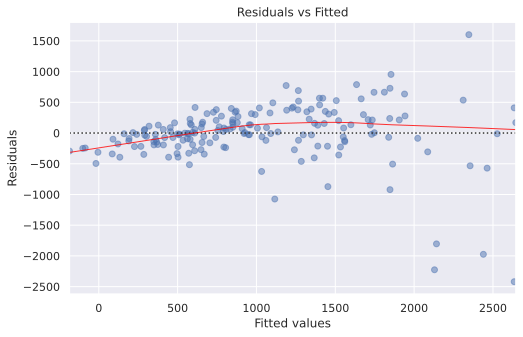

In [131]:
# model values
model_fitted_y = reg_data @ a + b
# model residuals
model_residuals = model_fitted_y - price_col
# normalized residuals
model_norm_residuals = get_standartized_residuals(model_residuals, sm.add_constant(X))
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)


plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sb.residplot(model_fitted_y, model_residuals, data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

plt.savefig('res_vs_fitted_with_shops.png', dpi=DPI_VALUE)

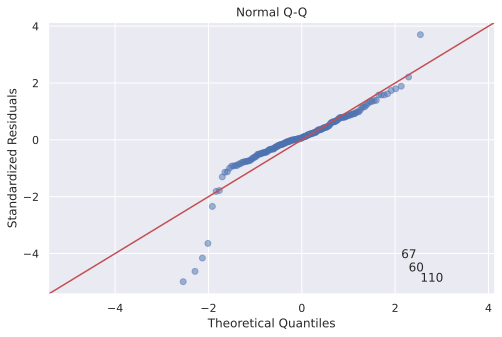

In [132]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
plt.savefig('qq_plot_with_shops.png', dpi=DPI_VALUE)

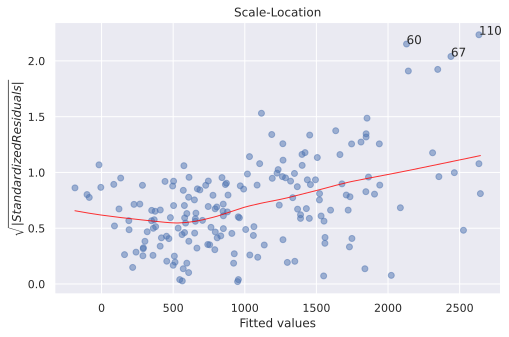

In [134]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sb.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                             xy=(model_fitted_y[i],
                                 model_norm_residuals_abs_sqrt[i]));
plt.savefig('scale_location_with_shops.png', dpi=DPI_VALUE)

In [135]:
new_reg_cols = ['категория книг',
                'количество страниц',
                'визуальная привлекательность (1 - 5)',
                'качество обложки (1 - 5)',
                'качество переплёта (1 - 5)',
                'качество бумаги (1 - 5)',
                'качество печати (1 - 5)',
                'формат книги (0-3)',
                'размер книги (0-3)',
                'Читай-город',
                'Книжный лабиринт',
                'Молодая гвардия']

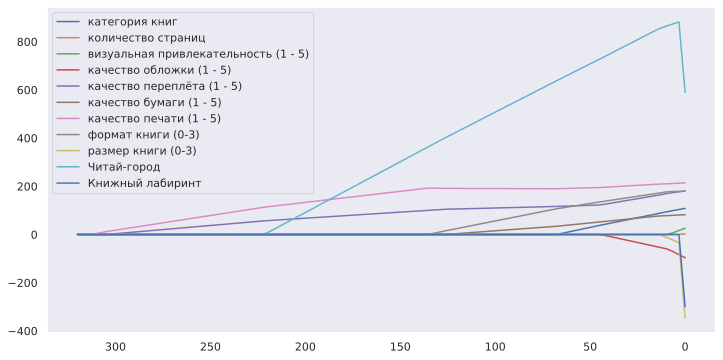

In [136]:
alpha_lst = np.linspace(0.001, 320, 100)

alpha_y = list()

X = reg_data_train
Y = price_train

plt.figure(figsize=(12, 6))

for alpha in alpha_lst:
    clf = Lasso(alpha=alpha)

    Liner = clf.fit(X, Y)

    a = np.array(Liner.coef_)
    b = Liner.intercept_
    Y_new = np.matmul(X, a) + b
    
    alpha_y.append(list(Liner.coef_))
alpha_y = np.array(alpha_y).T
for i, arr in enumerate(alpha_y):
    plt.plot(alpha_lst, arr, label=f"{new_reg_cols[i]}")
plt.grid()
plt.legend()
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.savefig('price_lambdas_with_shops.png', dpi=DPI_VALUE)

In [137]:
X_ = np.array(reg_data_train)
X_[:, 1] = X_[:, 1] / X_.mean()
Y_ = np.array(price_train)
Y_ = Y_/Y_.mean()

In [138]:
def get_fitted(x, y):
    X = pd.DataFrame(x)
    Y = pd.DataFrame(y)

    # generate OLS model
    model = sm.OLS(Y, sm.add_constant(X))
    model_fit = model.fit()
    
    model_fitted_y = model_fit.fittedvalues
    
    return model_fitted_y

In [139]:
lmbds = scipy.optimize.minimize(func, 0.0*np.ones(len(X_[0]) + 1))

In [140]:
lmbds.x

array([ 3.37711377e+01,  1.60435382e+00,  1.79015730e+00,  4.08296043e+00,
        7.18214821e-01,  1.44692391e+01, -2.24488862e-02,  2.20876840e+00,
        4.68616184e-06,  3.33112138e-06,  7.37105840e-06, -1.69367724e-01])

In [141]:
X = np.zeros(X_.shape)
for i, x in enumerate(X_.T):
  X[:, i] = stats.boxcox(x, lmbds.x[i])

num = 1
for n in Y_:
    num *= n
num = num**(1/len(Y_))
    
y = num**(1-lmbds['x'][-1])*stats.boxcox(Y_, lmbds['x'][-1])

In [142]:
X = pd.DataFrame(X)
Y = pd.DataFrame(y)

# generate OLS model
model = sm.OLS(Y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, Y for easier plot handling
dataframe = pd.concat([X, Y], axis=1)

In [143]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

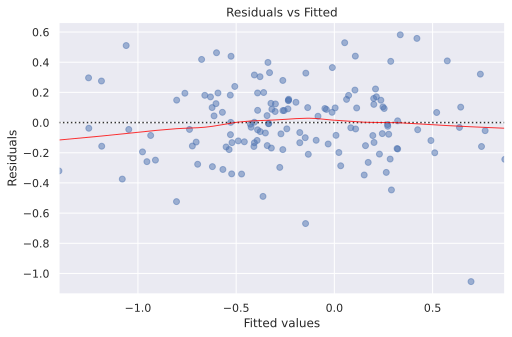

In [145]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sb.residplot(model_fitted_y, model_residuals, data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

plt.savefig('res_vs_fitted_boxcox_with_shops.png', dpi=DPI_VALUE)

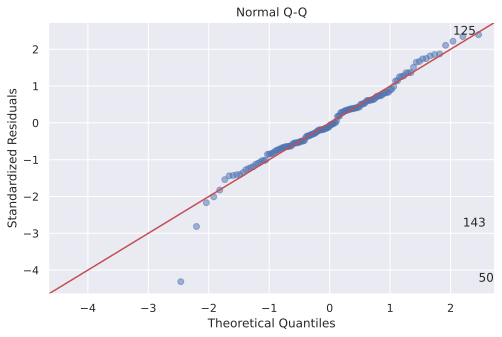

In [146]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
plt.savefig('qq_plot_boxcox_with_shops.png', dpi=DPI_VALUE)

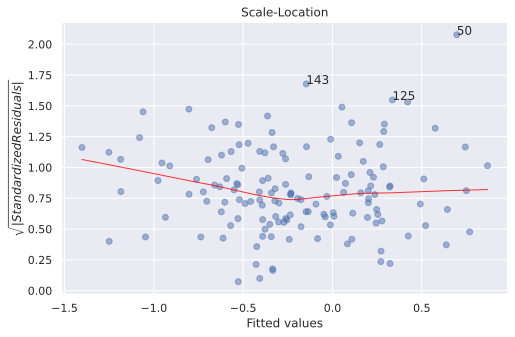

In [148]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sb.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
  plot_lm_3.axes[0].annotate(i,
                             xy=(model_fitted_y[i],
                                 model_norm_residuals_abs_sqrt[i]));
plt.savefig('scale_location_boxcox_with_shops.png', dpi=DPI_VALUE)

In [149]:
ri = model_fitted_y.values - Y[0].values
stats.jarque_bera(ri)

Jarque_beraResult(statistic=20.280985189033522, pvalue=3.944936549749034e-05)

In [150]:
stats.shapiro(ri)

ShapiroResult(statistic=0.9748364090919495, pvalue=0.009355824440717697)

In [151]:
statsmodels.stats.diagnostic.het_breuschpagan(model_fit.resid, model_fit.model.exog)

(6.72323733350165, 0.8210330196744502, 1.351731690056315, 0.2464027408007501)

In [152]:
statsmodels.stats.diagnostic.acorr_breusch_godfrey(model_fit, nlags=12)

(12.202629359937958, 0.42954656974811, 1.0724578397950084, 0.3879189738723691)

In [154]:
check_data = np.array(reg_data_val)
check_data[:, 1] /= reg_data_train.mean()

X = np.zeros(check_data.shape)
for i, x in enumerate(check_data.T):
  X[:, i] = stats.boxcox(x, lmbds.x[i])

model_fitted_y_val = model_fit.predict(sm.add_constant(X))

In [155]:
price_preds = inverse_price(np.array(model_fitted_y_val))
price_preds

array([ 803.5342364 ,  451.86520277,  705.50433571,  482.13695528,
        438.93298534,  629.81249836, 2091.64991593, 1152.1800835 ,
        723.84644649,  760.85213124,  766.97593423,  922.7692067 ,
        363.86430578, 2302.84312995, 1176.06134317, 1262.79911809,
        424.55456593,  521.78959045, 1479.29611499, 1024.89089761,
       1985.74204866,  663.96522875, 1178.10776849, 1890.02486127,
        637.60213276,  489.22490536, 2909.98671406, 1939.86932226,
        225.15382763,  386.52417696,  452.6635308 ,  558.1247311 ,
        477.53634754,  930.79512331,  858.81332374, 1247.80198443])

In [156]:
abs(price_preds - price_val).mean()

242.17898649775304

In [157]:
columns = ['Магазин', 'качество бумаги (1 - 5)', 'формат книги (0-3)', 'количество страниц']

reg_df = np.array(main_df[columns])

reg_df[reg_df == 'Читай-город'] = 1.
reg_df[reg_df == 'Книжный лабиринт'] = 2.
reg_df[reg_df== 'Молодая гвардия'] = 3.

reg_data = reg_df.astype('float32')

reg_data[:, -1] += 1.

price_col = np.array(main_df['цена'])

reg_data = reg_data[perm]
price_col = price_col[perm]

In [158]:
shop_cols = reg_data[:, 0]

In [159]:
binary_shop_cols = np.ones((len(reg_data), 3))

for i, col in enumerate(shop_cols):
  binary_shop_cols[i, int(col - 1)] = 2

In [160]:
reg_data = np.concatenate((reg_data, binary_shop_cols), axis=1)

In [161]:
reg_data = np.delete(reg_data, 0, axis=1)

In [162]:
indices = [i for i in range(144) if i not in []]

reg_data_train = reg_data[:144]
reg_data_val   = reg_data[144:]

price_train = price_col[:144]
price_val   = price_col[144:]

reg_data_train = reg_data_train[indices]
price_train = price_train[indices]

In [163]:
import statsmodels.nonparametric.kernel_regression
X_ = reg_data_train
Y_ = price_train

In [164]:
model_fit_l = statsmodels.nonparametric.kernel_regression.KernelReg(Y_, X_, 'cccccc', 'll')

In [165]:
X = pd.DataFrame(X_)
y = pd.DataFrame(Y_)
dataframe = pd.concat([X, y], axis=1)

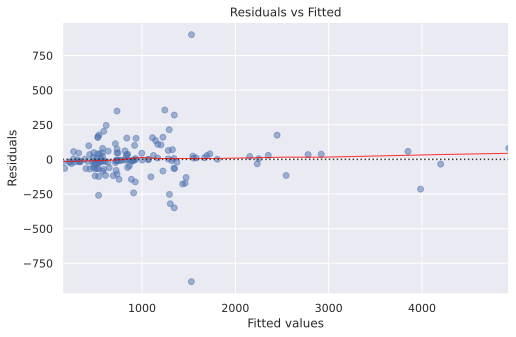

In [166]:
# model values
model_fitted_y = model_fit_l.fit(X_)[0]
# model residuals
model_residuals = model_fitted_y - Y_
model_norm_residuals = get_standartized_residuals(model_residuals, sm.add_constant(X))
model_norm_residuals_abs_sqrt = np.sqrt(abs(model_norm_residuals))


plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sb.residplot(model_fitted_y, model_residuals, data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');
plt.savefig('res_vs_fitted_non_parametric.png', dpi=DPI_VALUE)

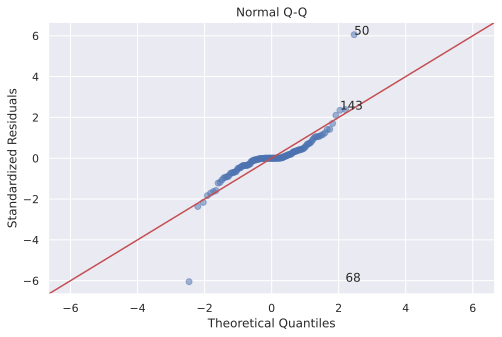

In [167]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
plt.savefig('qq_plot_non_parametric.png', dpi=DPI_VALUE)

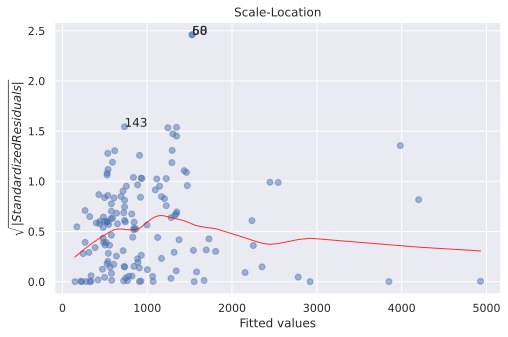

In [168]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sb.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
  plot_lm_3.axes[0].annotate(i,
                             xy=(model_fitted_y[i],
                                 model_norm_residuals_abs_sqrt[i]));
plt.savefig('scale_location_boxcox_with_shops.png', dpi=DPI_VALUE)

In [169]:
(abs(model_fit_l.fit(reg_data_val)[0] - price_val)).mean()

289.290839621911

In [170]:
(abs(model_fit_l.fit(reg_data_train)[0] - price_train)).mean()

80.58281709407014

In [171]:
reg_cols = ['количество страниц',
            'качество обложки (1 - 5)',
            'качество бумаги (1 - 5)',
            'формат книги (0-3)']

In [172]:
reg_df = np.array(main_df[reg_cols])

reg_df[reg_df == 'популярные бестселлеры'] = 1.
reg_df[reg_df == 'научно-популярная литература'] = 2.
reg_df[reg_df == 'классика'] = 3.

reg_data = reg_df.astype('float32')

reg_data[:, -1:] += 1.

price_col = np.array(main_df['цена'])

#split dataset to validation and train part
perm = np.array([ 80, 136, 134, 137,   9, 149, 160,  83, 110, 105,  58, 148,  87,
        97,  64, 161, 127, 170, 108, 145, 151, 147,  82,  42,   1, 175,
         6,   0,  23,  90, 103, 168, 169, 165,  12, 104, 115,  62,  56,
       116, 144,  51,  57, 146,  47, 132,  84,  18,  50, 153, 166,  95,
       179, 177, 126, 164, 125,  74, 139, 138, 150, 100, 141,  38, 106,
         8,  75,  39,  34,   5,  89,  11,  36,  10,  70,  28,  48, 128,
        19, 113, 107,  27,  49,  21,  41, 117,  25,  20,  63, 172,  96,
        61,  91, 152,  98,  53, 171,  86,  55,  66,   4, 120, 130, 178,
        43, 143,  17,  71, 112, 121,  44, 135,   7,  24, 114, 129,  46,
         2,  73,  13, 101,  76,  29, 176,  99,  40, 155, 133,  31,  88,
        92,  32, 119,  85,  26,  14,  22, 159,  94,  35, 163,  59,  79,
        69,  45,  65, 109,  78, 111,  16,  54,  30, 118, 142,  67,  72,
       123, 174,  52, 157, 102, 131, 156,  37, 167,   3, 154,  33,  77,
        68, 158, 162,  60, 124, 140, 122,  93,  15,  81, 173])

reg_data = reg_data[perm]
price_col = price_col[perm]

In [173]:
indices = [i for i in range(144) if i not in []]

reg_data_train = reg_data[:144]
reg_data_val   = reg_data[144:]

price_train = price_col[:144]
price_val   = price_col[144:]

reg_data_train = reg_data_train[indices]
price_train = price_train[indices]

In [174]:
model = Lasso(alpha=0.5)

Liner = model.fit(reg_data_train, price_train)

a = Liner.coef_
b = Liner.intercept_

price_pred = reg_data_val @ a + b

In [176]:
X_ = np.array(reg_data_train)
X_[:, 1] = X_[:, 1] / X_.mean()
Y_ = np.array(price_train)
Y_ = Y_/Y_.mean()

In [177]:
lmbds = scipy.optimize.minimize(func, 0.*np.ones(len(X_[0]) + 1))
lmbds.x

array([ 0.3039793 , -0.0380735 ,  0.        ,  0.        , -0.28726967])

In [178]:
X = np.zeros(X_.shape)
for i, x in enumerate(X_.T):
  X[:, i] = stats.boxcox(x, lmbds.x[i])

num = 1
for n in Y_:
    num *= n
num = num**(1/len(Y_))
    
y = num**(1-lmbds['x'][-1])*stats.boxcox(Y_, lmbds['x'][-1])

In [179]:
X = pd.DataFrame(X)
Y = pd.DataFrame(y)

# generate OLS model
model = sm.OLS(Y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, Y for easier plot handling
dataframe = pd.concat([X, Y], axis=1)

In [180]:
check_data = np.array(reg_data_val)
check_data[:, 1] /= reg_data_train.mean()

X = np.zeros(check_data.shape)
for i, x in enumerate(check_data.T):
  X[:, i] = stats.boxcox(x, lmbds.x[i])

model_fitted_y_val = model_fit.predict(sm.add_constant(X))

In [181]:
price_preds = inverse_price(np.array(model_fitted_y_val))
price_preds

array([ 557.19531137,  604.70479684,  831.53609527,  619.28023598,
        406.63213387,  743.15450794, 1022.48214664,  569.76168393,
        782.03625036, 1025.13109521, 1149.26532993, 1408.83551093,
        384.60365484,  978.3261046 ,  606.05168055,  705.73790173,
        416.17508962,  821.57662412,  861.98225079,  579.38830429,
        921.21477455,  799.86949071,  802.07254494, 1046.29787885,
       1095.00820131,  674.26841786, 1457.13821649,  971.23637372,
        183.53485923,  425.95411869,  544.93679973,  760.52862426,
        433.55498693, 1120.41680006, 1131.88623014,  571.75155388])

In [182]:
abs(price_preds - price_val).mean()

378.6749104811999

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
main_df2 = xl.parse('Лист2') 


In [194]:
reg = main_df2[]

,категория книг,название,Магазин,цена,количество страниц,визуальная привлекательность (1 - 5),качество обложки (1 - 5),качество переплёта (1 - 5),качество бумаги (1 - 5),качество печати (1 - 5),формат книги (0-3),размер книги (0-3),эксперт
0,популярные бестселлеры,как ты умрёшь,Читай-город,579.0,350.0,3.0,4.0,3.0,4.0,4.0,1.0,1.0,1.0
1,популярные бестселлеры,девы,Читай-город,579.0,348.0,3.0,3.0,3.0,4.0,4.0,1.0,1.0,1.0
2,популярные бестселлеры,Гарри Поттер принц полукровка,Читай-город,1064.0,687.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,1.0
3,популярные бестселлеры,тысяча сияющих солнц,Читай-город,852.0,415.0,4.0,5.0,3.0,4.0,5.0,1.0,1.0,1.0
4,популярные бестселлеры,ход королевы,Читай-город,531.0,351.0,3.0,4.0,3.0,4.0,3.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,популярные бестселлеры,подсознание может всё,Книжный лабиринт,1700.0,160.0,4.0,5.0,5.0,4.0,3.0,1.0,1.0,3.0
176,популярные бестселлеры,говори с собой правильно,Книжный лабиринт,1680.0,229.0,3.0,4.0,4.0,4.0,5.0,2.0,1.0,3.0
177,популярные бестселлеры,look inside рефлексируй анализируй меняйся,Книжный лабиринт,1530.0,165.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,3.0
178,популярные бестселлеры,ток как совершать выгодные шаги без потерь,Книжный лабиринт,2300.0,256.0,1.0,4.0,4.0,5.0,5.0,2.0,2.0,3.0


In [257]:
from sklearn import metrics
from sklearn import tree

In [256]:
from sklearn.model_selection import train_test_split
X = main_df[columns]
y = main_df['Магазин']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [259]:
clf1 = DecisionTreeClassifier(max_depth=2,criterion = 'entropy')
clf1 = clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5370370370370371


In [260]:
clf2 = DecisionTreeClassifier(max_depth=3,criterion = 'entropy')
clf2 = clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.48148148148148145


In [261]:
clf3 = DecisionTreeClassifier(max_depth=4,criterion = 'entropy')
clf3 = clf3.fit(X_train,y_train)
y_pred = clf3.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5


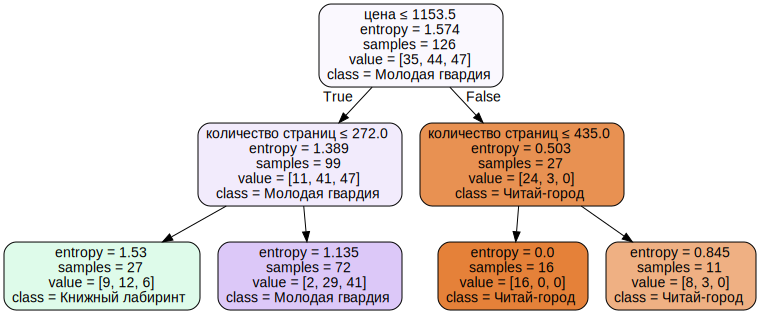

In [306]:
dot_data = tree.export_graphviz(clf1, out_file=None, feature_names=columns, class_names=['Читай-город', 'Книжный лабиринт', 'Молодая гвардия'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("treed2")  
graph 



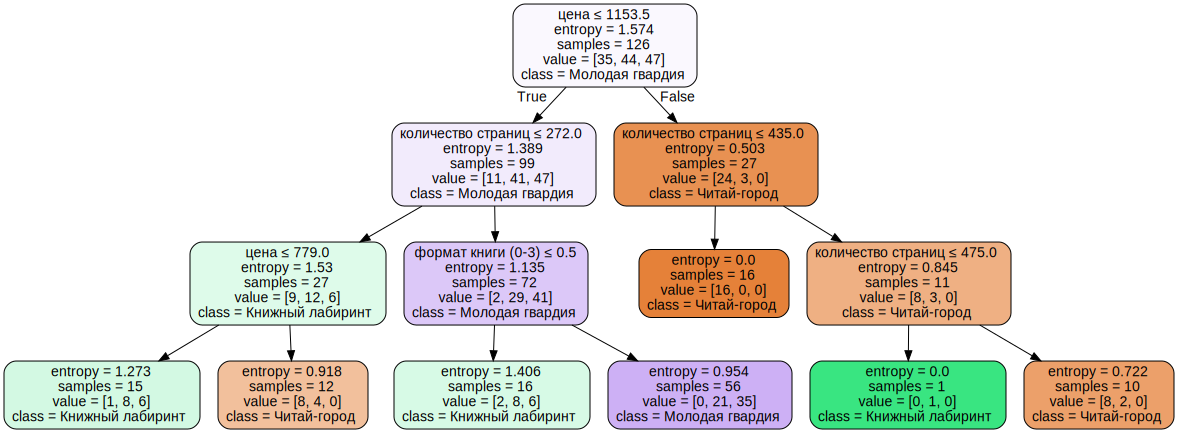

<Figure size 576x360 with 0 Axes>

In [304]:
dot_data = tree.export_graphviz(clf2, out_file=None, feature_names=columns, class_names=['Читай-город', 'Книжный лабиринт', 'Молодая гвардия'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("treed3")  
plt.savefig("tree2",bbox_inches='tight', dpi = 200)
graph 

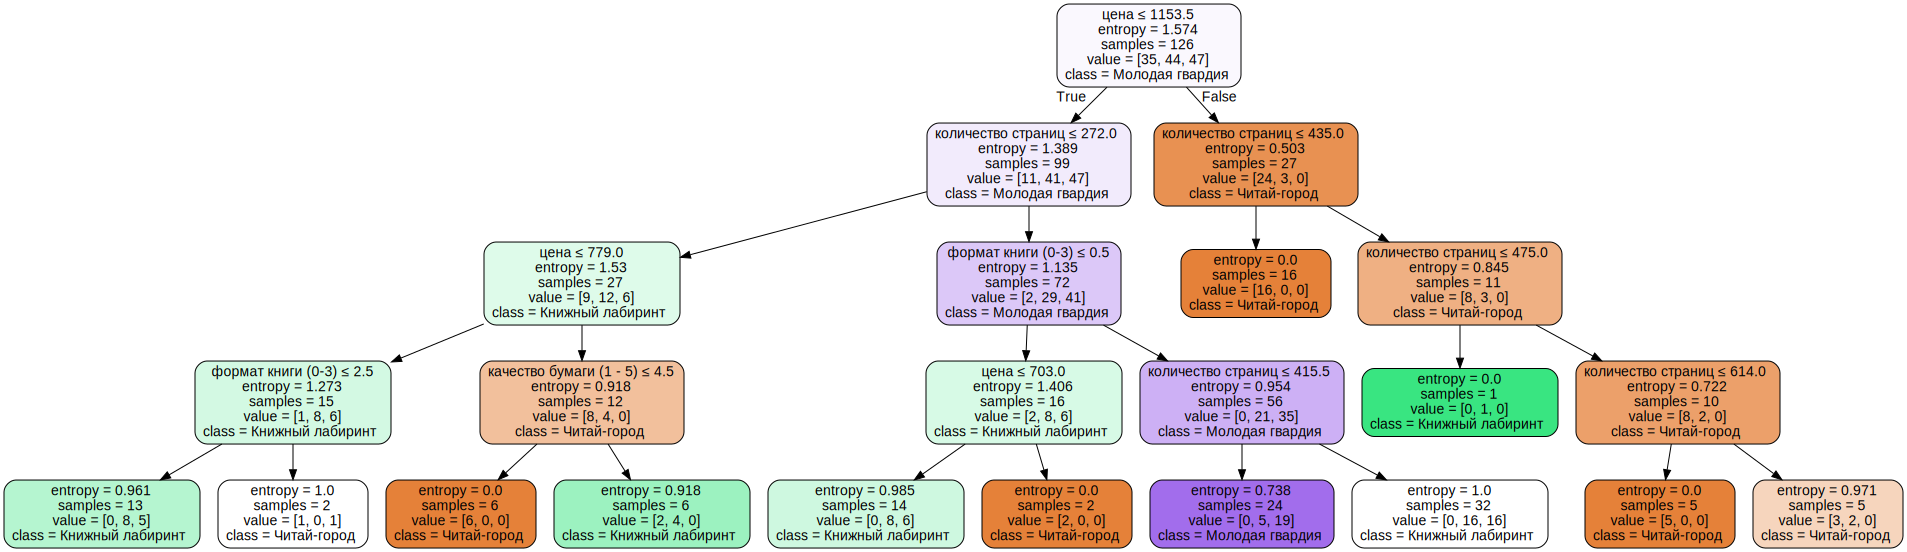

In [307]:
dot_data = tree.export_graphviz(clf3, out_file=None, feature_names=columns, class_names=['Читай-город', 'Книжный лабиринт', 'Молодая гвардия'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("treed4")
graph 

In [ ]:
main_df1 = xl.parse('Лист8') 
main_df2=xl.parse('Лист7')
main_df2["цена"] /= main_df2["цена"].mean()
main_df2["количество страниц"] /= main_df2["количество страниц"].mean()
main_df1["цена"] /= main_df1["цена"].mean()
main_df1["количество страниц"] /= main_df1["количество страниц"].mean()
main_df2["цена"] *= 4;
main_df2["количество страниц"] *= 4;

In [274]:
pca=PCA(n_components=11).fit(main_df2)
A=np.array(pca.components_)
B=np.array(main_df2)
B=np.transpose(B)
C=A@B
D=C[0:3]
D=np.transpose(D)

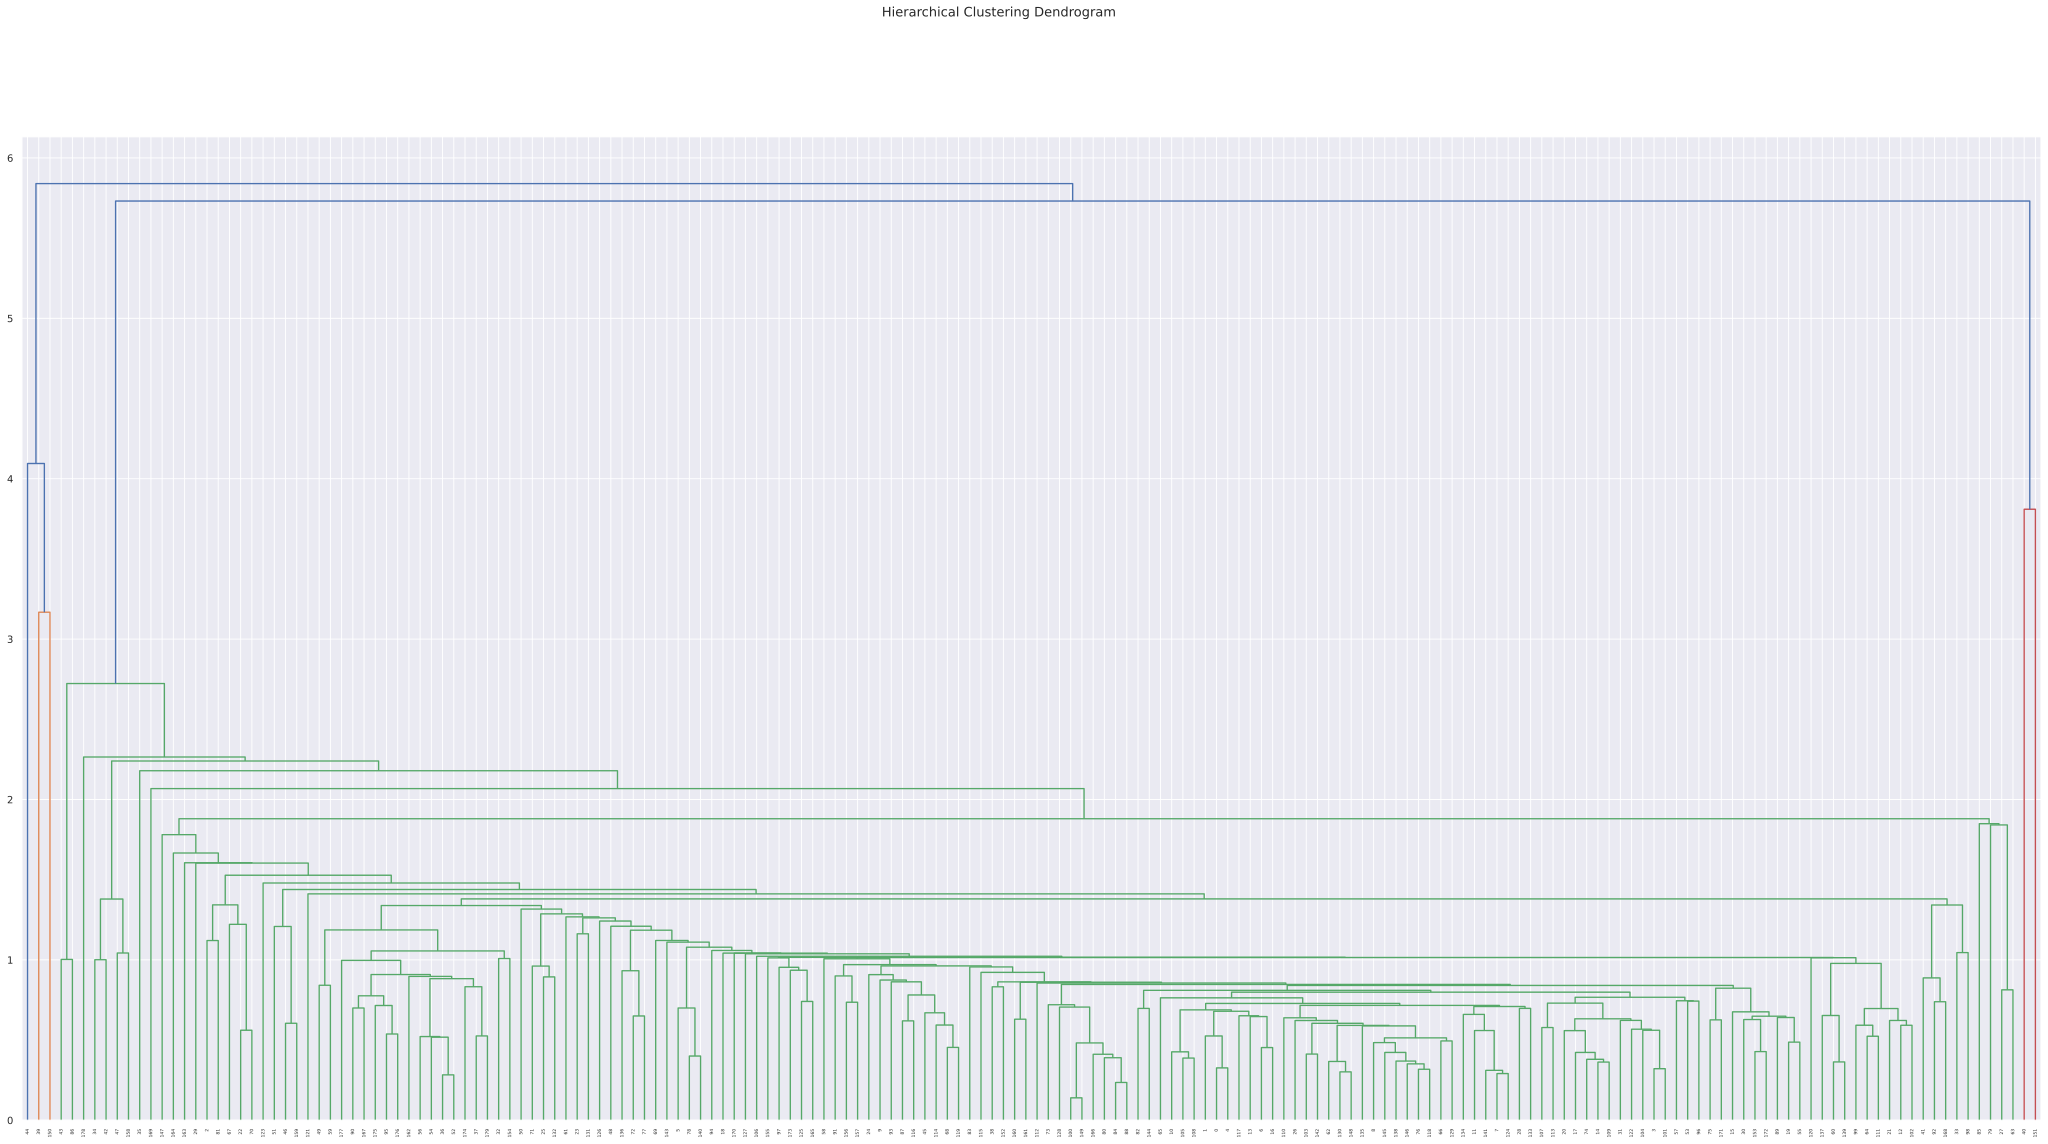

In [275]:
Z = hierarchy.linkage(D,'single') 
fig=plt.figure(1,figsize=(40,20))
fig.suptitle('Hierarchical Clustering Dendrogram')
dn=hierarchy.dendrogram(Z)
plt.savefig("dendogram",bbox_inches='tight', dpi=200)

In [276]:
categories=main_df2.columns
fig=plt.figure(2,figsize=(20,20))
fig.suptitle('BPlot')
X=main_df2
y=KMeans(n_clusters=3, random_state=0).fit_predict(D)
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
x_new = pca.fit_transform(X)

<Figure size 1440x1440 with 0 Axes>

In [314]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,c=y, s = 5) 
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,width=0.003)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center',fontsize=5)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center',fontsize=5)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1),fontsize=15)
    plt.ylabel("PC{}".format(2),fontsize=15)
    plt.grid()

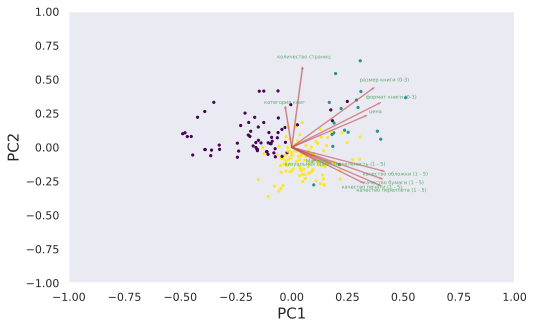

In [315]:
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),labels=categories)
plt.savefig("biplot",bbox_inches='tight', dpi = 200)